<h1>Live / offline difference</h1>

___

In [1]:
import sys
sys.path.insert(0, '/mxn/home/reblex/.local/lib/python3.8/site-packages')
from ptypy import io

from ptypy.utils import imsave
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import re
import ptypy.utils as u
from ptypy.utils import rmphaseramp
from skimage.restoration import unwrap_phase
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift
import ipywidgets as widgets
from matplotlib.gridspec import GridSpec
import h5py
%matplotlib widget
plt.ion()

WARNING ptypy - Message Passaging for Python (mpi4py) not found.
    CPU-parallelization disabled.
    Install python-mpi4py via the package repositories or with `pip install --user mpi4py`


#### ___
<h2>Load and process data</h2>

___

<h3>Load data</h3>

In [3]:
#offline
filenames1 = {'0':  'data/staff/nanomax/reblex/0004_MIH/scan0152_crop256_defocus2000_itcont1_a0.8/livesim_scannr0152_startframe237__dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '1':  'data/staff/nanomax/reblex/0002_3wt/livesim0004_startframe132__dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '2':  'data/staff/nanomax/reblex/0002_3wt/livesim1103_startframe292__dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '3':  'data/staff/nanomax/reblex/0002_3wt/livesim1209_startframe292__dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '4':  'data/staff/nanomax/reblex/0002_3wt/livesim1233_startframe292__dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '5':  'data/staff/nanomax/reblex/0002_3wt/livesim1243_startframe292__dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '6':  'data/staff/nanomax/reblex/0002_3wt/livesim1297_startframe292__dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '7':  'data/staff/nanomax/reblex/0002_3wt/livesim1383_startframe292__dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '8':  '/data/staff/nanomax/reblex/0003_Au250Ag100/livesim_startframe670__dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '9':  '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/good_from_sim07/NTT_1190_startframe2912_crop1024_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '10': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/good_from_sim07/NTT_1190_startframe2912_crop512_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '11': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/good_from_sim07/NTT_1190_startframe2912_crop512_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '12': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/good_from_sim07/NTT_1190_startframe2912_crop512_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '13': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/good_from_sim07/NTT_1190_startframe2912_crop512_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '14': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/good_from_sim07/NTT_1190_startframe2912_crop512_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '15': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/from_sim256px_08/NTT_1190_startframe2912_crop256_fpb50_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '16': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/from_sim256px_08/NTT_1190_startframe2912_crop256_fpb50_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '17': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/from_sim256px_08/NTT_1190_startframe2912_crop256_fpb50_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '18': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/from_sim256px_08/NTT_1190_startframe2912_crop256_fpb50_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '19': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_data/NTT_1190_256px_08_testing2_posnoise/rec/rec_scan_001190_DM_pycuda_0100.ptyr',#'/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/from_sim256px_08/NTT_1190_prGT_startframe2912_crop256_fpb50_dist367_defocus980_a0.8_18/rec/rec_scan_000018_DM_pycuda_1000.ptyr'
              '20': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_14/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '21': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_intensity1e0_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '22': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_intensity1e1_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '23': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_intensity1e2_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '24': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_intensity1e3_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '25': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_intensity1e4_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '26': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_intensity1e5_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '27': '/data/staff/nanomax/reblex/data-simulated-recons/Diamond/simulated_data/Diam_no-zoom-or-offset_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '28': '/data/staff/nanomax/reblex/data-simulated-recons/Diamond/simulated_data/Diam_no-zoom-or-offset_ML_01/rec/rec_scan_000000_ML_pycuda_3000.ptyr',
              '29': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_04/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '30': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_08/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '31': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_ step2px_r20_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '32': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_ step2px_r15_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '33': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_ step2px_r10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '34': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step2px_r5_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '35': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step2px_r25_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '36': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r5_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '37': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '38': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r15_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '39': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r20_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '40': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r5_01/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '41': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r5_1e10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '42': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r5_1e09_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '43': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r5_1e08_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '44': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r5_1e12_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '45': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r5_1e13_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '46': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r10_1e+12_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '47': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_64px_Au-Si3N4_gauss_step10px_r40_1e+12_RAAR_01/rec/rec_scan_000000_RAAR_1000.ptyr',
              '48': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_64px_Au-Si3N4_gauss_step10px_r40_1e+12_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '49': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_64px_Au-Si3N4_gauss_step10px_r40_1e+12_01/dumps/dump_scan_000000_DM_pycuda_2000.ptyr',
              '50': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_recons/from_simg_64px_Au-Si3N4_gauss_step10px_r40_1e+12_01/simg_startframe400__fpb25_01/rec/rec_scan_000001_DM_pycuda_3000.ptyr',
              '51': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_recons/from_simg_256px_Au-Si3N4_step10px_1e+12_00/simg_startframe400__fpb25_00/rec/rec_scan_000000_DM_pycuda_3000.ptyr'
             }
#live
filenames2 = {'0':  'data/staff/nanomax/reblex/0004_MIH/scan0152_crop256_defocus2000_itcont1_a0.8/livesim_scannr0152_startframe1____dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_2104.ptyr',
              '1':  'data/staff/nanomax/reblex/0002_3wt/livesim0004_startframe1____dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_1712.ptyr',
              '2':  'data/staff/nanomax/reblex/0002_3wt/livesim1103_startframe1____dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_2300.ptyr',
              '3':  'data/staff/nanomax/reblex/0002_3wt/livesim1209_startframe1____dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_2351.ptyr',
              '4':  'data/staff/nanomax/reblex/0002_3wt/livesim1233_startframe1____dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_2297.ptyr',
              '5':  'data/staff/nanomax/reblex/0002_3wt/livesim1243_startframe1____dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_2319.ptyr',
              '6':  'data/staff/nanomax/reblex/0002_3wt/livesim1297_startframe1____dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_2295.ptyr',
              '7':  'data/staff/nanomax/reblex/0002_3wt/livesim1383_startframe1____dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_2350.ptyr',
              '8':  '/data/staff/nanomax/reblex/0003_Au250Ag100/livesim_startframe1____dist714_fpb10_00/rec/rec_scan_000000_DM_pycuda_1092.ptyr',
              '9':  '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/good_from_sim07/NTT_1190_startframe1____crop1024_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_1600.ptyr',
              '10': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/good_from_sim07/NTT_1190_startframe1____crop512_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_3489.ptyr',
              '11': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/good_from_sim07/NTT_1190_startframe1____crop512_fpb100_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_3671.ptyr',
              '12': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/good_from_sim07/NTT_1190_startframe100__crop512_fpb25_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_3055.ptyr',
              '13': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/good_from_sim07/NTT_1190_startframe500__crop512_fpb25_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_2023.ptyr',
              '14': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/good_from_sim07/NTT_1190_startframe1500_crop512_fpb25_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_1310.ptyr',
              '15': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/from_sim256px_08/NTT_1190_startframe1____crop256_fpb50_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_5452.ptyr',
              '16': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/from_sim256px_08/NTT_1190_startframe1____crop256_fpb20_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_4650.ptyr',
              '17': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/from_sim256px_08/NTT_1190_startframe1____crop256_fpb300_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_4649.ptyr',
              '18': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/from_sim256px_08/NTT_1190_flip_startframe1____crop256_fpb50_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_5486.ptyr',
              '19': '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_data/NTT_1190_256px_08_testing2/rec/rec_scan_001190_DM_pycuda_1000.ptyr',#'/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/from_sim256px_08/NTT_1190_startframe2912_crop256_fpb50_dist367_defocus980_a0.8_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr' # placeholder until I have a live recon with GT probe.
              '20': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_14/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '21': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_intensity1e0_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '22': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_intensity1e1_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '23': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_intensity1e2_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '24': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_intensity1e3_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '25': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_intensity1e4_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '26': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_intensity1e5_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '27': '/data/staff/nanomax/reblex/data-simulated-recons/Diamond/simulated_data/Diam_no-zoom-or-offset_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '28': '/data/staff/nanomax/reblex/data-simulated-recons/Diamond/simulated_data/Diam_no-zoom-or-offset_ML_01/rec/rec_scan_000000_ML_pycuda_3000.ptyr',
              '29': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_04/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '30': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_08/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '31': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_ step2px_r20_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '32': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_ step2px_r15_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '33': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_ step2px_r10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '34': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step2px_r5_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '35': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step2px_r25_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '36': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r5_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '37': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '38': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r15_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '39': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r20_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '40': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r5_01/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '41': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r5_1e10_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '42': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r5_1e09_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '43': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r5_1e08_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '44': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r5_1e12_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '45': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r5_1e13_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '46': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_gauss_step4px_r10_1e+12_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '47': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_64px_Au-Si3N4_gauss_step10px_r40_1e+12_RAAR_01/rec/rec_scan_000000_RAAR_1000.ptyr',
              '48': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_64px_Au-Si3N4_gauss_step10px_r40_1e+12_00/rec/rec_scan_000000_DM_pycuda_1000.ptyr',
              '49': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_64px_Au-Si3N4_gauss_step10px_r40_1e+12_01/dumps/dump_scan_000000_DM_pycuda_2000.ptyr',
              '50': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_recons/from_simg_64px_Au-Si3N4_gauss_step10px_r40_1e+12_01/simg_startframe1____fpb25_00/rec/rec_scan_000000_DM_pycuda_6230.ptyr',
              '51': '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_recons/from_simg_256px_Au-Si3N4_step10px_1e+12_00/simg_startframe1____fpb25_00/rec/rec_scan_000000_DM_pycuda_5174.ptyr'
             }

scan = '51'
# scannr = {'0': '0152', '1': '0004', '2': '1103', '3': '1209', '4': '1233', '5': '1243', '6': '1297', '7': '1383', '8': '1092', '9': '1190', '10': '1190', '11': '1190', '12': '1190', '13': '1190', '14': '1190', '15': '1190', '16': '1190', '17': '1190', '18': '1190', '19': '1190', '20': 'siemensimg', '21': 'siemensimg', '22': 'siemensimg', '23': 'siemensimg', '24': 'siemensimg', '25': 'siemensimg', '26': 'siemensimg', '27': 'Diamond-data', '28': 'Diamond-data', '29': 'siemensimg_Au-Si3N4', '30': 'siemensimg_Au-Si3N4_gauss', '31': 'siemensimg_Au-Si3N4_gauss'}
# scannr = scannr[scan]
samplename = {'31': '_step2px_r20', '32': '_step2px_r15_00', '33': '_step2px_r10', '34': '_step2px_r5', '35': '_step2px_r25', '36': '_step4px_r5', '37': '_step4px_r10', '38': '_step4px_r15', '39': '_step4px_r20', '40': '_step4px_r5_relax0', '41': '_step4px_r5_relax0_1e10', '42': '_step4px_r5_relax0_1e09', '43': '_step4px_r5_relax0_1e08', '44': '_step4px_r5_relax0_1e12', '45': '_step4px_r5_relax0_1e13', '46': '_step4px_r10_relax0_1e12', '47': '_64px_step10px_r40_1e12_RAAR_', '48': '_64px_step10px_r40_1e12', '49': '_64px_step10px_r40_1e12_DM2000', '50': '_step10px_r40_1e12_probe-constant', '51': '_step10px_1e12_probe-constant'}
if scan not in samplename.keys():
    samplename[scan] = ''
    print('Obs! No sample name will be used when saving figures.')


fname1 = filenames1[scan]
#live
fname2 = filenames2[scan]

#print('Change "content/obj/Sscan_00G00/data" to "content/obj/Sscan00G00/data" when you go back to live recons!!')
obj1 = io.h5read(fname1, 'content/obj/Sscan00G00/data')['content/obj/Sscan00G00/data'][0]
obj2 = io.h5read(fname2, 'content/obj/Sscan00G00/data')['content/obj/Sscan00G00/data'][0]
pr1 = io.h5read(fname1, 'content/probe/Sscan00G00/data')['content/probe/Sscan00G00/data'][0]
pr2 = io.h5read(fname2, 'content/probe/Sscan00G00/data')['content/probe/Sscan00G00/data'][0]

obj1_psize = io.h5read(fname1, 'content/obj/Sscan00G00/_psize')['content/obj/Sscan00G00/_psize'][0]
obj2_psize = io.h5read(fname2, 'content/obj/Sscan00G00/_psize')['content/obj/Sscan00G00/_psize'][0]


<h3>Process data</h3>

In [4]:
# diff = pr1_ = io.h5read('/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_data/NTT_1190_256px_08_testing2/data/data_scan_001190.ptyd', 'chunks/0/data')['chunks/0/data'][0]
# np.sum(diff)

# Get the fnames of files containing the diffraction patterns:
dfile1 = glob.glob(fname1.rsplit('/',2)[0] + '/data/*.ptyd')[0]
dfile2 = glob.glob(fname2.rsplit('/',2)[0] + '/data/*.ptyd')[0]

diffraction1 = io.h5read(dfile1, 'chunks/0/data')['chunks/0/data']#[0]
mean_photons1 = np.sum(diffraction1)/diffraction1.shape[0]
print(mean_photons1)


714349071508.2798


In [53]:
obj1_abs = np.abs(obj1)
obj2_abs = np.abs(obj2)
obj1_abslog = np.log(obj1_abs)
obj2_abslog = np.log(obj2_abs)

obj1_phase = np.angle(obj1)
obj2_phase = np.angle(obj2)

# Remove phase ramp
def rampweight(ob, scale=3):
    weights = np.zeros(ob.shape)#np.zeros_like(ob)
    M, N = weights.shape
    #weights[M // scale:M - M // scale, N // scale:N - N // scale] = 1  # centered box
    weights[int(M // scale):int(M - M // scale), int(N // scale):int(N - N // scale)] = 1  # centered box
    # weights[0:M - M // scale, N // scale:N - N // scale] = 1  # centered pillar
    #weights = np.abs(weights-1)  # Uncomment for inverting
    # always exlude a tiny bit on 
    mask = np.ones_like(weights, dtype=bool)
    # edge = 30
    # mask[ M//edge:M - M//edge , N//edge:N - N//edge  ] = False
    # weights[mask] = 0
    return weights
w1 = rampweight(obj1, scale=100)#100) #5) #np.abs(rampweight(obj1, scale=3)-1)
w2 = rampweight(obj2, scale=100)#100) #5) #np.abs(rampweight(obj2, scale=3)-1)
#w1[:,:w1.shape[1]//2]=0  # only use the weights on the right side
#w2[:,:w2.shape[1]//2]=0  # only use the weights on the right side
# w1 = np.ones_like(obj1)
# w2 = np.ones_like(obj2)
obj1_ramp, ramp1 = rmphaseramp(obj1, w1, return_phaseramp=True)#rampweight(obj1, scale=3)
obj1_ramp, ramp1 = rmphaseramp(obj1_ramp, w1, return_phaseramp=True)#rampweight(obj1, scale=3)
obj1_ramp, ramp1 = rmphaseramp(obj1_ramp, w1, return_phaseramp=True)#rampweight(obj1, scale=3)
obj2_ramp, ramp2 = rmphaseramp(obj2, w2, return_phaseramp=True)
obj2_ramp, ramp2 = rmphaseramp(obj2_ramp, w2, return_phaseramp=True)
obj2_ramp, ramp2 = rmphaseramp(obj2_ramp, w2, return_phaseramp=True)
obj1_phaseramp = np.angle(obj1_ramp)
obj2_phaseramp = np.angle(obj2_ramp)
obj1_phaseramp_unwrapped = unwrap_phase(obj1_phaseramp) # unwrap_phase must have real input & output
obj2_phaseramp_unwrapped = unwrap_phase(obj2_phaseramp)
# ############################################################################################## ??????
#angle_trunc = lambda a: (a + np.ceil(abs(a) / (2 * np.pi)) * 2 * np.pi + np.pi) % (np.pi * 2) - np.pi # sets an array of radians into the interval (-pi, pi)
# obj1_phaseramp_unwrapped = angle_trunc(unwrap_phase(obj1_phaseramp)) # unwrap_phase must have real input & output
# obj2_phaseramp_unwrapped = angle_trunc(unwrap_phase(obj2_phaseramp))
# ############################################################################################## ??????
# shift1, error, phasediff = phase_cross_correlation(unwrap_phase(obj1_phaseramp)[100:-100,100:-100], unwrap_phase(obj2_phaseramp)[100:-100,100:-100], upsample_factor=100)

# diff_phase = obj1_phase - obj2_phase # goodplt.figure()
# diff_abslog_od = obj1_abslog - obj2_abslog # optical density
# diff_phaseramp_unwrappedshift = shift(obj1_phaseramp_unwrapped, [0.0, -0.15]) - obj2_phaseramp_unwrapped
# diff_phaseramp_unwrappedshift_ramp = np.angle(rmphaseramp(  np.exp(1j*diff_phaseramp_unwrappedshift), rampweight(np.exp(1j*diff_phaseramp_unwrappedshift), scale=3)  ))

obj1_rmramp_abs = np.abs(obj1_ramp)
obj2_rmramp_abs = np.abs(obj2_ramp)
obj1_rmramp_abslog = np.log(obj1_rmramp_abs)
obj2_rmramp_abslog = np.log(obj2_rmramp_abs)
diff_rmramp_abslog = obj1_rmramp_abslog - obj2_rmramp_abslog

diff_abslog_od = obj1_abslog - obj2_abslog # optical density
diff_phase = obj1_phase - obj2_phase
diff_phaseramp = obj1_phaseramp - obj2_phaseramp
diff_phaseramp_unwrapped = obj1_phaseramp_unwrapped - obj2_phaseramp_unwrapped
diff_phaseramp_unwrapped_ramp = np.angle(rmphaseramp(  np.exp(1j*diff_phaseramp_unwrapped), rampweight(np.exp(1j*diff_phaseramp_unwrapped), scale=3)  ))

marg = 100#500#250
shift1, error, phasediff = phase_cross_correlation(obj1_phaseramp_unwrapped[marg:-marg,marg:-marg], obj2_phaseramp_unwrapped[marg:-marg,marg:-marg], upsample_factor=1000)
# Update some differences according to the calculated shift between the offline-live recons.
#shift_val = np.array([-0.010, 0.565]) # [0.005, 0.604]
#obj2_phaseramp_unwrapped = shift(obj2_phaseramp_unwrapped, shift_val)#, [-0.015,  0.0  ])
#diff_phaseramp_unwrapped = obj1_phaseramp_unwrapped - obj2_phaseramp_unwrapped
#diff_phaseramp_unwrapped_ramp = np.angle(rmphaseramp(  np.exp(1j*diff_phaseramp_unwrapped), rampweight(np.exp(1j*diff_phaseramp_unwrapped), scale=3)  ))


# O = A * e^(i * phi) = e^(a + i* phi)
# A = np.abs(O)  # amplitude
# a = np.log(A)  # optical density

#temporary

# def set_vminvmax(arr, std_factor):
#     vmin = np.mean(arr[marg:-marg,marg:-marg]) - std_factor*np.std(arr[marg:-marg,marg:-marg])
#     vmax = np.mean(arr[marg:-marg,marg:-marg]) + std_factor*np.std(arr[marg:-marg,marg:-marg])
#     return vmin, vmax
# fig0 = plt.figure(figsize=(6,7),tight_layout={'pad': 0.0})
# fig0.subplots_adjust(left=0.03, bottom=0.01, right=0.97, top=0.99, wspace=0.33, hspace=0.02)
# im0 = plt.imshow(obj1_phaseramp_unwrapped[220-130:220+140,220-130:220+140], origin='lower')
# im0.set_clim(set_vminvmax(im0.get_array().data, 1))
# plt.colorbar(im0, ax=plt.gca(), fraction=0.046, pad=0.04)

In [54]:
shift1 #100: array([0.026, 0.017]), 200: array([0.022, 0.014])
#array([ 0.422, -0.211])

array([0., 0.])

___
<h2>Plot data</h2>

___

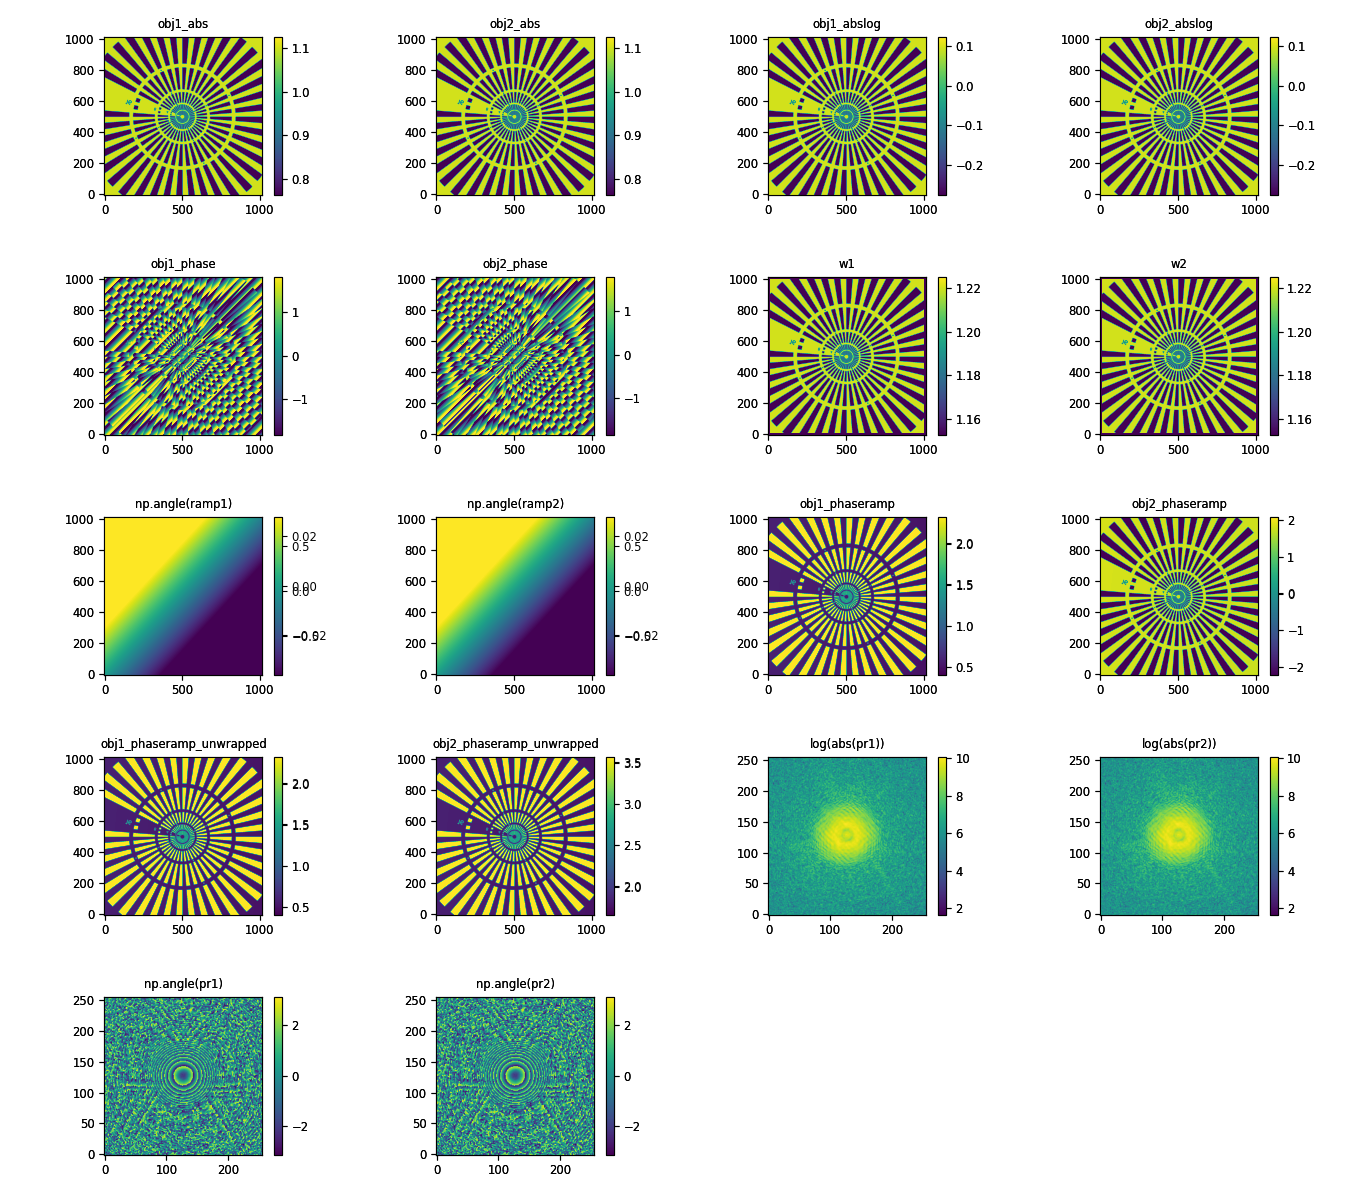

In [55]:
plt.cla()
plt.clf()
fig1 = plt.figure(num='First', figsize=(13.5, 12.0),tight_layout={'pad': 0.0})
fig1.subplots_adjust(left=0.03, bottom=0.05, right=0.97, top=0.9, wspace=0.33, hspace=0.2)
plt.rcParams['figure.titlesize'] = 'large' # default: 'large'
plt.rcParams['axes.titlesize'] = 'small' # default: 'large'
plt.rcParams['xtick.labelsize'] = 'small' # default: 'medium'
plt.rcParams['ytick.labelsize'] = 'small' # default: 'medium'

ax = [None]*18
gs1 = GridSpec(5, 8)
ax[0] = fig1.add_subplot(gs1[0, 0:2])
ax[1] = fig1.add_subplot(gs1[0, 2:4])
ax[2] = fig1.add_subplot(gs1[0, 4:6])
ax[3] = fig1.add_subplot(gs1[0, 6:8])

gs2 = GridSpec(5, 8)
ax[4] = fig1.add_subplot(gs2[1, 0:2])
ax[5] = fig1.add_subplot(gs2[1, 2:4])
ax[6] = fig1.add_subplot(gs2[1, 4:6])
ax[7] = fig1.add_subplot(gs2[1, 6:8])

gs3 = GridSpec(5, 8)
ax[8] = fig1.add_subplot(gs3[2, 0:2])
ax[9] = fig1.add_subplot(gs3[2, 2:4])
ax[10] = fig1.add_subplot(gs3[2, 4:6])
ax[11] = fig1.add_subplot(gs3[2, 6:8])

gs4 = GridSpec(5, 8)
ax[12] = fig1.add_subplot(gs4[3, 0:2])
ax[13] = fig1.add_subplot(gs4[3, 2:4])
ax[14] = fig1.add_subplot(gs4[3, 4:6])
ax[15] = fig1.add_subplot(gs4[3, 6:8])

gs5 = GridSpec(5, 8)
ax[16] = fig1.add_subplot(gs5[4, 0:2])
ax[17] = fig1.add_subplot(gs5[4, 2:4])
#ax[18] = fig1.add_subplot(gs5[4, 6:8])

im = [None]*18
im[0] = ax[0].imshow(obj1_abs, origin='lower')
im[1] = ax[1].imshow(obj2_abs, origin='lower')
im[2] = ax[2].imshow(obj1_abslog, origin='lower')
im[3] = ax[3].imshow(obj2_abslog, origin='lower')

im[4] = ax[4].imshow(obj1_phase, origin='lower') #
im[5] = ax[5].imshow(obj2_phase, origin='lower') #

im[6] = ax[6].imshow(np.abs(w1 + obj1_abs/5), origin='lower')
im[7] = ax[7].imshow(np.abs(w2 + obj2_abs/5), origin='lower')
im[8] = ax[8].imshow(np.angle(ramp1), origin='lower')
im[9] = ax[9].imshow(np.angle(ramp2), origin='lower')
# im[8] = ax[8].imshow(obj1_phase, origin='lower')
# im[9] = ax[9].imshow(obj2_phase, origin='lower')
im[10] = ax[10].imshow(obj1_phaseramp, origin='lower')
im[11] = ax[11].imshow(obj2_phaseramp, origin='lower')
im[12] = ax[12].imshow(obj1_phaseramp_unwrapped, origin='lower')
im[13] = ax[13].imshow(obj2_phaseramp_unwrapped, origin='lower')

im[14] = ax[14].imshow(np.log(np.abs(pr1)), origin='lower')
im[15] = ax[15].imshow(np.log(np.abs(pr2)), origin='lower')
im[16] = ax[16].imshow(np.angle(pr1), origin='lower')
im[17] = ax[17].imshow(np.angle(pr2), origin='lower')

for k in range(18):
    plt.colorbar(im[k], ax=ax[k], fraction=0.046, pad=0.04)

#titles = ['obj1_abs', 'obj2_abs', 'obj1_abslog', 'obj2_abslog', 'w1', 'w2', 'np.angle(ramp1)', 'np.angle(ramp2)', 'obj1_phase', 'obj2_phase', 'obj1_phaseramp', 'obj2_phaseramp', 'obj1_phaseramp_unwrapped', 'obj2_phaseramp_unwrapped']
titles = ['obj1_abs', 'obj2_abs', 'obj1_abslog', 'obj2_abslog', 'obj1_phase', 'obj2_phase', 'w1', 'w2', 'np.angle(ramp1)', 'np.angle(ramp2)', 'obj1_phaseramp', 'obj2_phaseramp', 'obj1_phaseramp_unwrapped', 'obj2_phaseramp_unwrapped', 'log(abs(pr1))', 'log(abs(pr2))', 'np.angle(pr1)', 'np.angle(pr2)']


for n, title in enumerate(titles):
    plt.setp(ax[n], title=title)

def set_vminvmax(arr, std_factor):
    vmin = np.mean(arr[marg:-marg,marg:-marg]) - std_factor*np.std(arr[marg:-marg,marg:-marg])
    vmax = np.mean(arr[marg:-marg,marg:-marg]) + std_factor*np.std(arr[marg:-marg,marg:-marg])
    return vmin, vmax

# im[0].norm.vmin = 0.4
# im[0].norm.vmax = 0.6
# im[0].get_array()
for m in range(len(im)-4):
    im[m].set_clim(set_vminvmax(im[m].get_array().data, 1.0))

# im[0].set_clim(0.4, 0.6)
plt.show()



# lables = {'15': '_fpb50', '16': '_fpb20', '17': '_fpb300', '18': '_flip'}
# lable = lables[scan] if scan in lables.keys() else ''
# fig1.savefig(fname2.rsplit('/', 2)[0] + f'/data{lable}.png')

In [42]:
savefigs = True#False
if savefigs:
    lables = {'15': '_fpb50', '16': '_fpb20', '17': '_fpb300', '18': '_flip'}
    lable = lables[scan] if scan in lables.keys() else samplename[scan]
    fig1.savefig(fname2.rsplit('/', 2)[0] + f'/data{lable}.png')

___
<h2>Plot differences</h2>

___

<h4>Before shift correction</h4>

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
 UPDATE NEW ENTRANCE IN slider_values WITH KEY , '51': [0.11, 0.8, 0.8, 1.1, 0.8]
 --------------------------------------------------------------------------------
--------------------------------------------------------------------------------



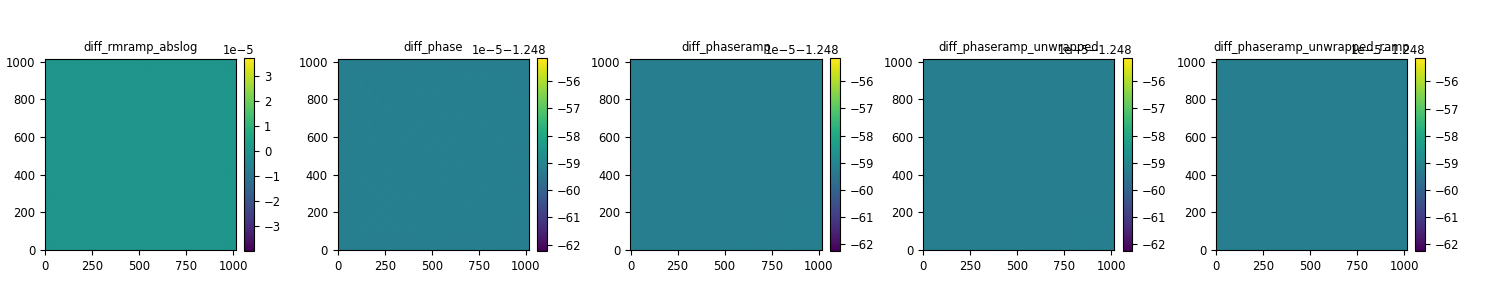

In [56]:
angle_trunc = lambda a: (a + np.ceil(abs(a) / (2 * np.pi)) * 2 * np.pi + np.pi) % (np.pi * 2) - np.pi # sets an array of radians into the interval (-pi, pi)
# VMIN0 = np.mean(diff_phase) - 0.5 * np.std(diff_phase)
# VMAX0 = np.mean(diff_phase) + 0.5 * np.std(diff_phase)
# VMIN1 = np.mean(diff_phaseramp) - 0.1 * np.std(diff_phaseramp)
# VMAX1 = np.mean(diff_phaseramp) + 0.1 * np.std(diff_phaseramp)
# VMIN2 = np.mean(diff_rmramp_abslog) - 0.5 * np.std(diff_rmramp_abslog)
# VMAX2 = np.mean(diff_rmramp_abslog) + 0.5 * np.std(diff_rmramp_abslog)

# obj2_phaseramp_unwrapped = shift(obj2_phaseramp_unwrapped, shift1)#[-0.0,  0.0  ])
# diff_phaseramp_unwrapped = obj1_phaseramp_unwrapped - obj2_phaseramp_unwrapped
# diff_phaseramp_unwrapped_ramp = np.angle(rmphaseramp(  np.exp(1j*diff_phaseramp_unwrapped), rampweight(np.exp(1j*diff_phaseramp_unwrapped), scale=3)  ))

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(3 * 5, 3))
fig.subplots_adjust(left=0.03, bottom=0.07, right=0.95, top=0.9, wspace=0.40, hspace=0.2)
subfig0 = axs[0].imshow(diff_rmramp_abslog, origin='lower')#norm=mpl.colors.LogNorm(vmin=2.27e-02))
subfig1 = axs[1].imshow(angle_trunc(diff_phase), origin='lower')
subfig2 = axs[2].imshow(angle_trunc(diff_phaseramp), origin='lower')
subfig3 = axs[3].imshow(angle_trunc(diff_phaseramp_unwrapped), origin='lower')
subfig4 = axs[4].imshow(angle_trunc(diff_phaseramp_unwrapped_ramp), origin='lower')
plt.colorbar(subfig0, ax=axs[0], fraction=0.046, pad=0.04)
plt.colorbar(subfig1, ax=axs[1], fraction=0.046, pad=0.04)
plt.colorbar(subfig2, ax=axs[2], fraction=0.046, pad=0.04)
plt.colorbar(subfig3, ax=axs[3], fraction=0.046, pad=0.04)
plt.colorbar(subfig4, ax=axs[4], fraction=0.046, pad=0.04)
plt.setp(axs[0], title='diff_rmramp_abslog')
plt.setp(axs[1], title='diff_phase')
plt.setp(axs[2], title='diff_phaseramp')
plt.setp(axs[3], title='diff_phaseramp_unwrapped')
plt.setp(axs[4], title='diff_phaseramp_unwrapped_ramp')

# Modified from https://github.com/matplotlib/matplotlib/issues/18563/
slider_values = {'0': [0.2, 1.2, 0.3, 4.0, 0.1], '1': [0.11, 0.8, 0.8, 1.1, 0.8], '2': [0.11, 1.2, 0.6, 1.5, 0.5], '3': [0.07, 0.8, 0.20, 1.2, 0.4], 
                '4': [0.11, 0.8, 0.8, 1.1, 0.8], '5': [0.11, 0.8, 0.8, 1.1, 0.8], '6': [0.11, 0.8, 0.8, 1.1, 0.8], '7': [0.11, 0.8, 0.8, 1.1, 0.8],
                '8': [1.0, 1.5, 1.8, 1.8, 1.8], '9': [0.11, 0.8, 0.8, 0.8, 0.8], '10': [0.11, 3.0, 2.0, 0.5, 0.5]}
if scan not in slider_values.keys():  # make sure there's an initial value for every scan-set.
    slider_values[scan] = [0.11, 0.8, 0.8, 1.1, 0.8]
    print(f"{''.center(80, '-')}\n{''.center(80, '-')}\n", f"UPDATE NEW ENTRANCE IN slider_values WITH KEY , '{scan}': [0.11, 0.8, 0.8, 1.1, 0.8]\n", f"{''.center(80, '-')}\n{''.center(80, '-')}\n")


"""slider0 = widgets.FloatSlider(value=slider_values[scan][0], min=0.01, max=1.0, step=0.01)
slider1 = widgets.FloatSlider(value=slider_values[scan][1], min=0.01, max=4.0, step=0.1)
slider2 = widgets.FloatSlider(value=slider_values[scan][2], min=0.01, max=4.0, step=0.1)
slider3 = widgets.FloatSlider(value=slider_values[scan][3], min=0.01, max=4.0, step=0.1)
slider4 = widgets.FloatSlider(value=slider_values[scan][4], min=0.01, max=4.0, step=0.1)
ui = widgets.HBox([slider0, slider1, slider2, slider3, slider4]) # 'success', 'info', 'warning' or 'danger'

def update(change):
    subfig0.norm.vmin = np.mean(diff_rmramp_abslog[marg:-marg,marg:-marg]) - slider0.value*np.std(diff_rmramp_abslog[marg:-marg,marg:-marg])
    subfig0.norm.vmax = np.mean(diff_rmramp_abslog[marg:-marg,marg:-marg]) + slider0.value*np.std(diff_rmramp_abslog[marg:-marg,marg:-marg])
    subfig1.norm.vmin = np.mean(angle_trunc(diff_phase[marg:-marg,marg:-marg])) - slider1.value*np.std(angle_trunc(diff_phase[marg:-marg,marg:-marg]))
    subfig1.norm.vmax = np.mean(angle_trunc(diff_phase[marg:-marg,marg:-marg])) + slider1.value*np.std(angle_trunc(diff_phase[marg:-marg,marg:-marg]))
    subfig2.norm.vmin = np.mean(angle_trunc(diff_phaseramp[marg:-marg,marg:-marg])) - slider2.value*np.std(angle_trunc(diff_phaseramp[marg:-marg,marg:-marg]))
    subfig2.norm.vmax = np.mean(angle_trunc(diff_phaseramp[marg:-marg,marg:-marg])) + slider2.value*np.std(angle_trunc(diff_phaseramp[marg:-marg,marg:-marg]))
    subfig3.norm.vmax = np.mean(angle_trunc(diff_phaseramp_unwrapped[marg:-marg,marg:-marg])) + slider3.value*np.std(angle_trunc(diff_phaseramp_unwrapped[marg:-marg,marg:-marg]))
    subfig3.norm.vmin = np.mean(angle_trunc(diff_phaseramp_unwrapped[marg:-marg,marg:-marg])) - slider3.value*np.std(angle_trunc(diff_phaseramp_unwrapped[marg:-marg,marg:-marg]))
    subfig4.norm.vmin = np.mean(angle_trunc(diff_phaseramp_unwrapped_ramp[marg:-marg,marg:-marg])) - slider4.value*np.std(angle_trunc(diff_phaseramp_unwrapped_ramp[marg:-marg,marg:-marg]))
    subfig4.norm.vmax = np.mean(angle_trunc(diff_phaseramp_unwrapped_ramp[marg:-marg,marg:-marg])) + slider4.value*np.std(angle_trunc(diff_phaseramp_unwrapped_ramp[marg:-marg,marg:-marg]))
    fig.canvas.draw()
    
slider0.observe(update, names='value')
slider1.observe(update, names='value')
slider2.observe(update, names='value')
slider3.observe(update, names='value')
slider4.observe(update, names='value')
display(ui)

#fig.set_dpi(200)"""

def add_slider(arr, subfig, init_slider_value=1):
    slider = widgets.FloatSlider(value=init_slider_value, min=0.1, max=4.0, step=0.01)
    return slider, arr, subfig

def update(change):
    for k, (slider, arr, subfig) in enumerate(sliders):
        subfig.norm.vmin = np.mean(arr[marg:-marg,marg:-marg]) - slider.value*np.std(arr[marg:-marg,marg:-marg])
        subfig.norm.vmax = np.mean(arr[marg:-marg,marg:-marg]) + slider.value*np.std(arr[marg:-marg,marg:-marg])

sliders = []
for val, subfig in enumerate([subfig0, subfig1, subfig2, subfig3, subfig4]):
    slider, arr, subfig = add_slider(subfig.get_array().data, subfig, init_slider_value=slider_values[scan][val])
    sliders.append((slider, arr, subfig))
    slider.observe(update, names='value')

ui1 = widgets.HBox([slider for slider, _, _ in sliders])
display(ui1)

<h4>After shift correction</h4>

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
 UPDATE NEW ENTRANCE IN shift_vals WITH , '51': np.array([0.0, 0.0])
 --------------------------------------------------------------------------------
--------------------------------------------------------------------------------



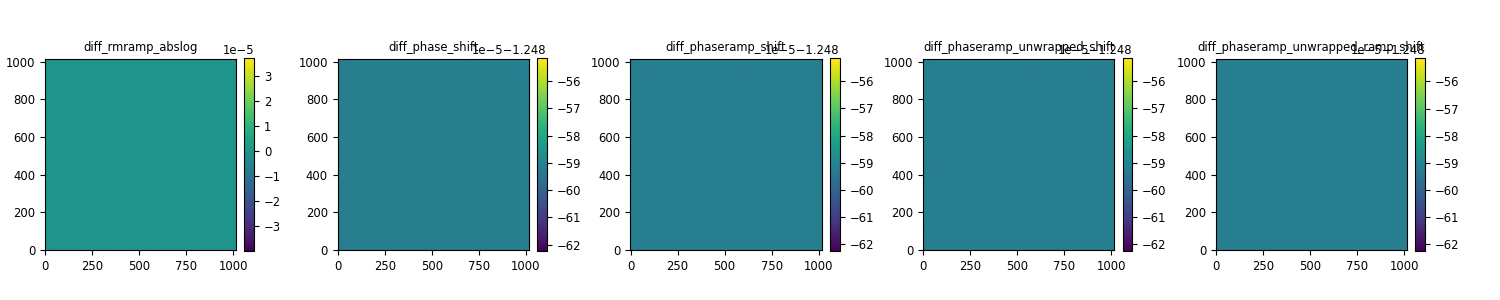

In [44]:
shift_vals = {'0': np.array([-0.010, 0.565]), '1': shift1, '2': np.array([0., 0.210]), '3': np.array([0.020, 0.013]), 
                '4': shift1, '5': shift1, '6': shift1, '7': shift1, '8': np.array([ 0.34, -0.5]), '9': np.array([-0.4,  1.35]),
                '10': np.array([0.039, -0.33])} # array([ 0.34 , -0.157]) # 9: array([-0.009,  2.156])
if scan not in shift_vals.keys(): # make sure there's an shift value for every scan-set.
    shift_vals[scan] = shift1
    print(f"{''.center(80, '-')}\n{''.center(80, '-')}\n", f"UPDATE NEW ENTRANCE IN shift_vals WITH , '{scan}': np.array({[shift1[0], shift1[1]]})\n", f"{''.center(80, '-')}\n{''.center(80, '-')}\n")

shift_val = shift_vals[scan]

###############--> obj2_abslog_shift = shift(obj2_abslog, shift_val)#, [-0.015,  0.0  ])
obj2_rmramp_abslog_shift = shift(obj2_rmramp_abslog, shift_val)#, [-0.015,  0.0  ])
obj2_phase_shift = shift(obj2_phase, shift_val)#, [-0.015,  0.0  ])
obj2_phaseramp_shift = shift(obj2_phaseramp, shift_val)#, [-0.015,  0.0  ])
obj2_phaseramp_unwrapped_shift = shift(obj2_phaseramp_unwrapped, shift_val)#, [-0.015,  0.0  ])

###############--> diff_rmramp_abslog_shift = obj1_abslog - obj2_abslog_shift # optical density
diff_rmramp_abslog_shift = obj1_rmramp_abslog - obj2_rmramp_abslog_shift # optical density
diff_phase_shift = obj1_phase - obj2_phase_shift
diff_phaseramp_shift = obj1_phaseramp - obj2_phaseramp_shift
diff_phaseramp_unwrapped_shift = obj1_phaseramp_unwrapped - obj2_phaseramp_unwrapped_shift
diff_phaseramp_unwrapped_ramp_shift = np.angle(rmphaseramp(  np.exp(1j*diff_phaseramp_unwrapped_shift), rampweight(np.exp(1j*diff_phaseramp_unwrapped_shift), scale=3)  ))

fig3, axs = plt.subplots(nrows=1, ncols=5, figsize=(3 * 5, 3))
fig3.subplots_adjust(left=0.03, bottom=0.07, right=0.95, top=0.9, wspace=0.40, hspace=0.2)
subfig5 = axs[0].imshow(diff_rmramp_abslog_shift, origin='lower')#norm=mpl.colors.LogNorm(vmin=2.27e-02))
subfig6 = axs[1].imshow(angle_trunc(diff_phase_shift), origin='lower')
subfig7 = axs[2].imshow(angle_trunc(diff_phaseramp_shift), origin='lower')
subfig8 = axs[3].imshow(angle_trunc(diff_phaseramp_unwrapped_shift), origin='lower')
subfig9 = axs[4].imshow(angle_trunc(diff_phaseramp_unwrapped_ramp_shift), origin='lower')
plt.colorbar(subfig5, ax=axs[0], fraction=0.046, pad=0.04)
plt.colorbar(subfig6, ax=axs[1], fraction=0.046, pad=0.04)
plt.colorbar(subfig7, ax=axs[2], fraction=0.046, pad=0.04)
plt.colorbar(subfig8, ax=axs[3], fraction=0.046, pad=0.04)
plt.colorbar(subfig9, ax=axs[4], fraction=0.046, pad=0.04)
plt.setp(axs[0], title='diff_rmramp_abslog')
plt.setp(axs[1], title='diff_phase_shift')
plt.setp(axs[2], title='diff_phaseramp_shift')
plt.setp(axs[3], title='diff_phaseramp_unwrapped_shift')
plt.setp(axs[4], title='diff_phaseramp_unwrapped_ramp_shift')
# ui = widgets.HBox([slider0, slider1, slider2, slider3, slider4])
# slider0.observe(update, names='value')
# slider1.observe(update, names='value')
# slider2.observe(update, names='value')
# slider3.observe(update, names='value')
# slider4.observe(update, names='value')
# display(ui)

# subfig2.axes.set_xlim(650, 850) #(200, 400)
# subfig2.axes.set_ylim(650, 850) #(200, 400)
# subfig3.axes.set_xlim(650, 850) #150, 500)
# subfig3.axes.set_ylim(650, 850) #(100, 500)

# subfig3.axes.set_xlim(marg,obj1.shape[0]-marg)#marg:-marg,marg:-marg]
# subfig3.axes.set_ylim(marg,obj1.shape[1]-marg)
#fig3.set_dpi(200)

sliders = []
for val, subfig in enumerate([subfig5, subfig6, subfig7, subfig8, subfig9]):
    slider, arr, subfig = add_slider(subfig.get_array().data, subfig, init_slider_value=slider_values[scan][val])
    sliders.append((slider, arr, subfig))
    slider.observe(update, names='value')

ui2 = widgets.HBox([slider for slider, _, _ in sliders])
display(ui2)

<h3>True reference diff</h3>

In [57]:
# Load GT data.
"""
If the reconstructions are made on simulated data, compare the difference between the original probe and object.
"""
pr = None

if int(scan) in list(range(0,9)):
    print(scan,'no GT')
    fname3 = None
elif int(scan) in list(range(9,15)):
    fname3 = '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/original_recon/NTT_1190_startframe2912_crop1024_dist367_defocus980_a0.8_00/dumps/dump_scan_000000_DM_pycuda_1000.ptyr'
elif int(scan) in list(range(15,20)):
    fname3 = '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/original_recon/NTT_1190_startframe2912_crop256_dist367_defocus980_a0.8_00/dumps/dump_scan_000000_DM_pycuda_1000.ptyr'
elif int(scan) in list(range(20,27)):
    fname3 = '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/41566_2016_Article_BFnphoton2015279_Fig1_HTML.png'
elif int(scan) in list(range(27,29)):
    fname3 = '/data/staff/nanomax/reblex/data-simulated-recons/Diamond/simulated_data/Diam_01/data/data_scan_000000.ptyd'#"/home/reblex/Documents/Diamond-Workshop-2023/small_data/painting.jpg"
elif int(scan) in list(range(29,50)):
    fname3 = '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/siemens_array.npy'
    fname_pr = glob.glob(fname1.rsplit('/',2)[0] + '/data/*.ptyd')[0]
    pr = io.h5read(fname_pr, 'info/illumination/model')['info/illumination/model']
elif int(scan) in list(range(50,51)):
    fname3 = '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/siemens_array.npy'
    fname_pr = '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_64px_Au-Si3N4_gauss_step10px_r40_1e+12_01/data/data_scan_000000.ptyd'
    pr = io.h5read(fname_pr, 'info/illumination/model')['info/illumination/model']
elif int(scan) in list(range(51,70)):
    fname3 = '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/siemens_array.npy'
    fname_pr = '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/simulated_data/simg_256px_Au-Si3N4_step10px_1e+12_00/data/data_scan_000000.ptyd'
    pr = io.h5read(fname_pr, 'info/illumination/model')['info/illumination/model']

if fname3 is not None:
    if fname3.endswith('.ptyr'):
        obj = io.h5read(fname3, 'content/obj/Sscan00G00/data')['content/obj/Sscan00G00/data'][0]
        pr = io.h5read(fname3, 'content/probe/Sscan00G00/data')['content/probe/Sscan00G00/data'][0]
    elif fname3.endswith('.ptyd'):
        obj = io.h5read(fname3, 'info/sample/model')['info/sample/model']
        fname_pr = '/data/staff/nanomax/reblex/data-simulated-recons/Diamond/dls_i08_nanogold_recon.ptyr'
        pr = io.h5read(fname_pr, 'content/probe/Sscan_00G00/data')['content/probe/Sscan_00G00/data'][0]
    elif fname3.endswith('.npy'):
        obj = np.load(fname3)
        #fname_pr = "/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/original_recon/NTT_1190_startframe2912_crop256_dist367_defocus980_a0.8_00/dumps/dump_scan_000000_DM_pycuda_1000.ptyr"
        if pr is None:
            pr = io.h5read(fname_pr, 'content/probe/Sscan00G00/data')['content/probe/Sscan00G00/data'][0]
    else:
        from PIL import Image
        obj_arr = u.rgb2complex(np.array(Image.open(fname3)))
        obj = obj_arr*1e0
    obj_abs = np.abs(obj)
    obj_abslog = np.log(obj_abs)
    obj_phase = np.angle(obj)
    w = rampweight(obj, scale=100)
    obj_ramp, ramp = rmphaseramp(obj, w, return_phaseramp=True)
    obj_rmramp_abs = np.abs(obj_ramp)
    obj_rmramp_abslog = np.log(np.abs(obj_ramp))
    obj_phaseramp = np.angle(obj_ramp)
    obj_phaseramp_unwrapped = unwrap_phase(obj_phaseramp)


# if 'data-simulated-recons' in (fname1 and fname2):
#     if ('sim256px'  in (fname1 and fname2)) or ('_256px_'  in (fname1 and fname2)):
#         fname3 = '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/original_recon/NTT_1190_startframe2912_crop256_dist367_defocus980_a0.8_00/dumps/dump_scan_000000_DM_pycuda_1000.ptyr'
#     else:
#         fname3 = '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/original_recon/NTT_1190_startframe2912_crop1024_dist367_defocus980_a0.8_00/dumps/dump_scan_000000_DM_pycuda_1000.ptyr'

#     obj = io.h5read(fname3, 'content/obj/Sscan00G00/data')['content/obj/Sscan00G00/data'][0]
#     pr = io.h5read(fname3, 'content/probe/Sscan00G00/data')['content/probe/Sscan00G00/data'][0]

#     if 'Siemens-img' in (fname1 and fname2):
#         from PIL import Image
#         fname3 = '/data/staff/nanomax/reblex/data-simulated-recons/Siemens-img/41566_2016_Article_BFnphoton2015279_Fig1_HTML.png'
#         obj_arr = u.rgb2complex(np.array(Image.open(fname3)))
#         obj = obj_arr*1e3

#     obj_abs = np.abs(obj)
#     obj_abslog = np.log(obj_abs)
#     obj_phase = np.angle(obj)
#     w = rampweight(obj, scale=100)
#     obj_ramp, ramp = rmphaseramp(obj, w, return_phaseramp=True)
#     obj_rmramp_abs = np.abs(obj_ramp)
#     obj_rmramp_abslog = np.log(np.abs(obj_ramp))
#     obj_phaseramp = np.angle(obj_ramp)
#     obj_phaseramp_unwrapped = unwrap_phase(obj_phaseramp)


In [58]:
# Compare GT data with recons from simulations with DIFFERENT POSITIONS.


sh = obj_abs.shape
sh1 = obj1_abs.shape

if sh != sh1:
    # Also assuming that obj1_abs.shape == obj2_abs.shape here!
    
    padrow = (sh[0]-sh1[0])//2
    padcol = (sh[1]-sh1[1])//2
    # obj1_abs_pad = np.zeros(sh)    # old padding solution
    # obj1_abs_pad[ padrow:padrow+sh1[0], padcol:padcol+sh1[1] ] = obj1_abs    # old padding solution
    
    
    obj1_abs_pad = np.pad(obj1_abs, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    obj1_abslog_pad = np.pad(obj1_abslog, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    obj1_phase_pad = np.pad(obj1_phase, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    obj1_ramp_pad = np.pad(obj1_ramp, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    obj1_rmramp_abs_pad = np.pad(obj1_rmramp_abs, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    obj1_rmramp_abslog_pad = np.pad(obj1_rmramp_abslog, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    obj1_phaseramp_pad = np.pad(obj1_phaseramp, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    #obj1_phaseramp_pad = np.pad(obj1_phaseramp-(np.mean(obj1_phaseramp) -np.mean(obj_phaseramp)), ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    obj1_phaseramp_unwrapped_pad = np.pad(obj1_phaseramp_unwrapped, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))

    obj2_abs_pad = np.pad(obj2_abs, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    obj2_abslog_pad = np.pad(obj2_abslog, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    obj2_phase_pad = np.pad(obj2_phase, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    obj2_ramp_pad = np.pad(obj2_ramp, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    obj2_rmramp_abs_pad = np.pad(obj2_rmramp_abs, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    obj2_rmramp_abslog_pad = np.pad(obj2_rmramp_abslog, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    obj2_phaseramp_pad = np.pad(obj2_phaseramp, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    #obj2_phaseramp_pad = np.pad(obj2_phaseramp-(np.mean(obj2_phaseramp) -np.mean(obj_phaseramp)), ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    obj2_phaseramp_unwrapped_pad = np.pad(obj2_phaseramp_unwrapped, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
    
    marg = 220
    shift2offline, error, phasediff = phase_cross_correlation(obj_ramp[marg:-marg,marg:-marg], obj1_ramp_pad[marg:-marg,marg:-marg], upsample_factor=100)
    
    # obj1_abs
    # obj1_abslog
    # obj1_phase
    # obj1_ramp
    # obj1_rmramp_abs
    # obj1_rmramp_abslog
    # obj1_phaseramp
    # obj1_phaseramp_unwrapped
    
    ####
    print(sh, sh1, obj1_phaseramp_unwrapped_pad.shape, shift2offline)

(1341, 1341) (1016, 1016) (1341, 1341) [0. 0.]


In [59]:
sh != sh1

True

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
 UPDATE NEW ENTRANCE IN shift_vals WITH 
shift_vals1	, '51': np.array([0.0, 0.0])
shift_vals2	, '51': np.array([0.0, 0.0])
 --------------------------------------------------------------------------------
--------------------------------------------------------------------------------



(429.0, 912.0)

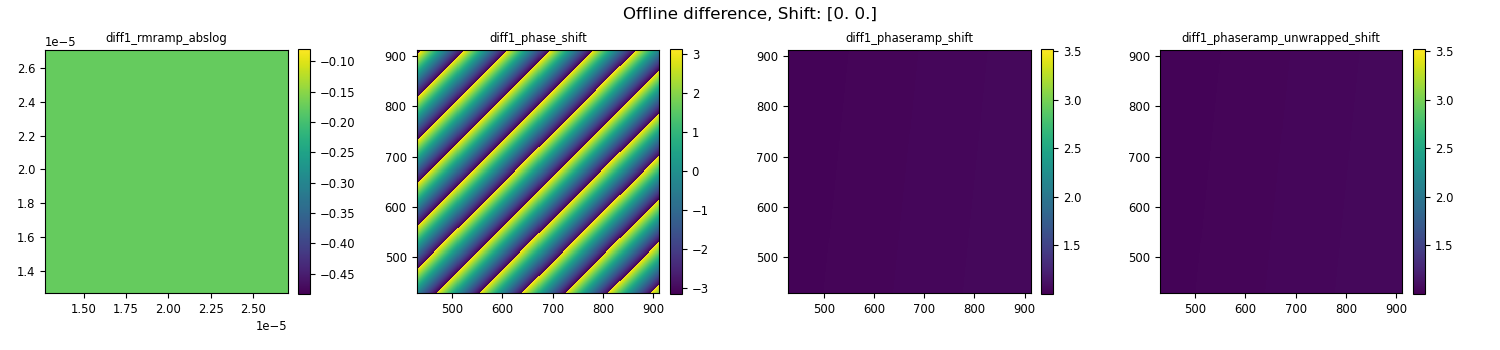

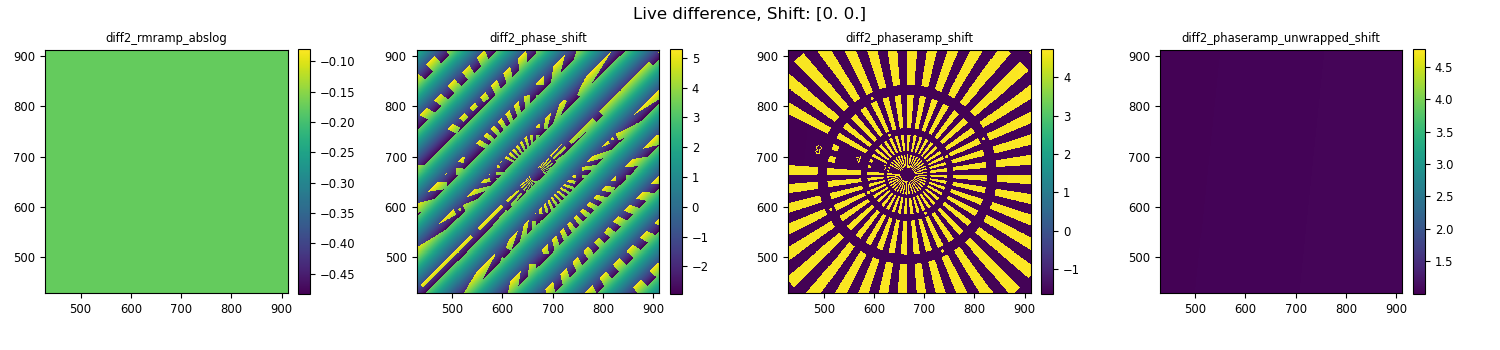

In [60]:
# Compare GT data with recons.
marg = ((min(sh) - max(sh1)) // 2) + int(max(sh1) // 3.8)

if sh != sh1:
    # Then we should use padded data obtained in the cell above!
    obj1_abs_ = obj1_abs_pad - np.mean(obj1_abs_pad[marg:-marg, marg:-marg])
    obj1_abslog_ = obj1_abslog_pad - np.mean(obj1_abslog_pad[marg:-marg, marg:-marg])
    obj1_phase_ = obj1_phase_pad - np.mean(obj1_phase_pad[marg:-marg, marg:-marg])
    obj1_ramp_ = obj1_ramp_pad - np.mean(obj1_ramp_pad[marg:-marg, marg:-marg])
    obj1_rmramp_abs_ = obj1_rmramp_abs_pad - np.mean(obj1_rmramp_abs_pad[marg:-marg, marg:-marg])
    obj1_rmramp_abslog_ = obj1_rmramp_abslog_pad - np.mean(obj1_rmramp_abslog_pad[marg:-marg, marg:-marg])
    obj1_phaseramp_ = obj1_phaseramp_pad - np.mean(obj1_phaseramp_pad[marg:-marg, marg:-marg])
    obj1_phaseramp_unwrapped_ = obj1_phaseramp_unwrapped_pad - np.mean(obj1_phaseramp_unwrapped_pad[marg:-marg, marg:-marg])

    obj2_abs_ = obj2_abs_pad - np.mean(obj2_abs_pad[marg:-marg, marg:-marg])
    obj2_abslog_ = obj2_abslog_pad - np.mean(obj2_abslog_pad[marg:-marg, marg:-marg])
    obj2_phase_ = obj2_phase_pad - np.mean(obj2_phase_pad[marg:-marg, marg:-marg])
    obj2_ramp_ = obj2_ramp_pad - np.mean(obj2_ramp_pad[marg:-marg, marg:-marg])
    obj2_rmramp_abs_ = obj2_rmramp_abs_pad - np.mean(obj2_rmramp_abs_pad[marg:-marg, marg:-marg])
    obj2_rmramp_abslog_ = obj2_rmramp_abslog_pad - np.mean(obj2_rmramp_abslog_pad[marg:-marg, marg:-marg])
    obj2_phaseramp_ = obj2_phaseramp_pad - np.mean(obj2_phaseramp_pad[marg:-marg, marg:-marg])
    obj2_phaseramp_unwrapped_ = obj2_phaseramp_unwrapped_pad - np.mean(obj2_phaseramp_unwrapped_pad[marg:-marg, marg:-marg])

obj_abs_ = obj_abs
obj_abslog_ = obj_abslog
obj_phase_ = obj_phase
obj_ramp_ = obj_ramp
obj_rmramp_abs_ = obj_rmramp_abs
obj_rmramp_abslog_ = obj_rmramp_abslog
obj_phaseramp_ = obj_phaseramp
obj_phaseramp_unwrapped_ = obj_phaseramp_unwrapped


shift2offline, error, phasediff1 = phase_cross_correlation(obj_ramp_, obj1_ramp_, upsample_factor=100)
shift2live, error, phasediff2 = phase_cross_correlation(obj_ramp_, obj2_ramp_, upsample_factor=100)

# best manual shifts: 15offline: np.array([2.038, -2.029])   - region differences
# 15live: np.array([2.037, -2.12]) - region differences
# 16live: np.array([1.34, -2.10])  - region differences
# 17live: np.array([2.02, -2.08])  - region differences
# 18live: np.array([1.77, -1.46])  - region differences

shift_vals1 = {'9': np.array([7.49, -8.5]), '10': np.array([4.00, -3.5]), '15': np.array([2.038, -2.029]), '16': np.array([2.038, -2.029]), '17': np.array([2.038, -2.029]), '18': np.array([2.038, -2.029])}  # 15: 2.013, -1.997
shift_vals2 = {'9':  np.array([7.776, -7.143]), '10': np.array([4.073, -3.982]), '15': np.array([2.037, -2.12]), '16': np.array([1.34, -2.10]), '17': np.array([2.02, -2.08]),
               '18': np.array([1.77, -1.46])}  # 2.013, -1.997, best by trial n err with angle_trunc: 1.995, -1.975
if scan not in shift_vals1.keys():  # make sure there's an shift value for every scan-set.
    shift_vals1[scan] = shift2offline
    shift_vals2[scan] = shift2live
    print(f"{''.center(80, '-')}\n{''.center(80, '-')}\n",
          f"UPDATE NEW ENTRANCE IN shift_vals WITH \nshift_vals1\t, '{scan}': np.array({[shift2offline[0], shift2offline[1]]})\nshift_vals2\t, '{scan}': np.array({[shift2live[0], shift2live[1]]})\n",
          f"{''.center(80, '-')}\n{''.center(80, '-')}\n")
else:
    shift2offline = shift_vals1[scan]
    shift2live = shift_vals2[scan]

if obj_rmramp_abslog_.shape != obj1_rmramp_abslog_.shape:
    print('Reconstructions have different shapes! Rebinning is made in order to calculate the difference, this might cause changes along the edges of the sample!')
    # Difference in offline recon
    diff1_rmramp_abslog_od = u.rebin_2d(obj_rmramp_abslog_[:3724, :3724], 2)[0] - obj1_rmramp_abslog_[:, :1862]  # optical density
    diff1_phase = u.rebin_2d(obj_phase_[:3724, :3724], 2)[0] - obj1_phase_[:, :1862]
    diff1_phaseramp = u.rebin_2d(obj_phaseramp_[:3724, :3724], 2)[0] - obj1_phaseramp_[:, :1862]
    diff1_phaseramp_unwrapped = u.rebin_2d(obj_phaseramp_unwrapped_[:3724, :3724], 2)[0] - obj1_phaseramp_unwrapped_[:, :1862]
    diff1_pr_phase = np.abs(u.rebin_2d(pr, 2)[0]) - np.abs(pr1)

    shift_offline = np.array([4.00, -3.5])  # 4.026, -3.672# 4.023, -3.611# 4.023, -3.5#4.00, -3.5 # 4.039, -3.673
    diff1_rmramp_abslog_od = u.rebin_2d(obj_rmramp_abslog_[:3724, :3724], 2)[0] - shift(obj1_rmramp_abslog_[:, :1862], shift_offline)
    diff1_phase = u.rebin_2d(obj_phase_[:3724, :3724], 2)[0] - shift(obj1_phase_[:, :1862], shift_offline)
    diff1_phaseramp = u.rebin_2d(obj_phaseramp_[:3724, :3724], 2)[0] - shift(obj1_phaseramp_[:, :1862], shift_offline)
    diff1_phaseramp_unwrapped = u.rebin_2d(obj_phaseramp_unwrapped_[:3724, :3724], 2)[0] - shift(obj1_phaseramp_unwrapped_[:, :1862], shift_offline)

    # Difference in live recon
    diff2_rmramp_abslog_od = u.rebin_2d(obj_rmramp_abslog_[:3724, :3724], 2)[0] - obj2_rmramp_abslog_[:, :1862]  # optical density
    diff2_phase = u.rebin_2d(obj_phase_[:3724, :3724], 2)[0] - obj2_phase_[:, :1862]
    diff2_phaseramp = u.rebin_2d(obj_phaseramp_[:3724, :3724], 2)[0] - obj2_phaseramp_[:, :1862]
    diff2_phaseramp_unwrapped = u.rebin_2d(obj_phaseramp_unwrapped_[:3724, :3724], 2)[0] - obj2_phaseramp_unwrapped_[:, :1862]
    diff2_pr_phase = np.abs(u.rebin_2d(pr, 2)[0]) - np.abs(pr2)

    shift_live = np.array([4.073, -3.982])  # 1.875, -4.835 # 4.0, -4.335
    diff2_rmramp_abslog_od = u.rebin_2d(obj_rmramp_abslog_[:3724, :3724], 2)[0] - shift(obj2_rmramp_abslog_[:, :1862], shift_live)
    diff2_phase = u.rebin_2d(obj_phase_[:3724, :3724], 2)[0] - shift(obj2_phase_[:, :1862], shift_live)
    diff2_phaseramp = u.rebin_2d(obj_phaseramp_[:3724, :3724], 2)[0] - shift(obj2_phaseramp_[:, :1862], shift_live)
    diff2_phaseramp_unwrapped = u.rebin_2d(obj_phaseramp_unwrapped_[:3724, :3724], 2)[0] - shift(obj2_phaseramp_unwrapped_[:, :1862], shift_live)
else:
    # # Difference in offline recon
    diff1_rmramp_abslog_od = obj_rmramp_abslog_ - shift(obj1_rmramp_abslog_, shift2offline) # optical density
    diff1_phase = obj_phase_ - shift(obj1_phase_, shift2offline)
    diff1_phaseramp = obj_phaseramp_ - shift(obj1_phaseramp_, shift2offline)
    diff1_phaseramp_unwrapped = obj_phaseramp_unwrapped_ - shift(obj1_phaseramp_unwrapped_, shift2offline)
    diff1_pr_abs = np.log(np.abs(pr)) - np.log(np.abs(pr1))
    diff1_pr_phase = np.angle(pr) - np.angle(pr1)
    diff1_phase[diff1_phase < np.pi] += 2*np.pi
    diff1_phase[diff1_phase > np.pi] -= 2*np.pi

    # Difference in live recon
    diff2_rmramp_abslog_od = obj_rmramp_abslog_ - shift(obj2_rmramp_abslog_, shift2live)  # optical density
    diff2_phase = obj_phase_ - shift(obj2_phase_, shift2live)
    diff2_phaseramp = obj_phaseramp_ - shift(obj2_phaseramp_, shift2live)
    diff2_phaseramp_unwrapped = obj_phaseramp_unwrapped_ - shift(obj2_phaseramp_unwrapped_, shift2live)
    diff2_pr_abs = np.abs(pr) - np.abs(pr2)
    diff2_pr_phase = np.angle(pr) - np.angle(pr2)

fig4, axs = plt.subplots(nrows=1, ncols=4, figsize=(3 * 5, 3.5))
fig4.subplots_adjust(left=0.03, bottom=0.07, right=0.95, top=0.95, wspace=0.40, hspace=0.2)
##subfig10 = axs[0].imshow(diff1_rmramp_abslog_od, origin='lower', interpolation='None')#norm=mpl.colors.LogNorm(vmin=2.27e-02))
x1 = np.arange(0, (sh[1] + 1) * obj1_psize, obj1_psize)
y1 = np.arange(0, (sh[0] + 1) * obj1_psize, obj1_psize)
X, Y = np.meshgrid(x1, y1)
subfig10 = axs[0].pcolormesh(X, Y, diff1_rmramp_abslog_od)  # , origin='lower', interpolation='None')
axs[0].set_box_aspect(sh[0] / sh[1])
subfig11 = axs[1].imshow((diff1_phase), origin='lower', interpolation='None')
subfig12 = axs[2].imshow((diff1_phaseramp), origin='lower', interpolation='None')
subfig13 = axs[3].imshow((diff1_phaseramp_unwrapped), origin='lower', interpolation='None')
plt.colorbar(subfig10, ax=axs[0], fraction=0.046, pad=0.04)
plt.colorbar(subfig11, ax=axs[1], fraction=0.046, pad=0.04)
plt.colorbar(subfig12, ax=axs[2], fraction=0.046, pad=0.04)
plt.colorbar(subfig13, ax=axs[3], fraction=0.046, pad=0.04)
plt.setp(axs[0], title='diff1_rmramp_abslog')
plt.setp(axs[1], title='diff1_phase_shift')
plt.setp(axs[2], title='diff1_phaseramp_shift')
plt.setp(axs[3], title='diff1_phaseramp_unwrapped_shift')
fig4.suptitle(f'Offline difference, Shift: {shift2offline}')

fig5, axs = plt.subplots(nrows=1, ncols=4, figsize=(3 * 5, 3.5))
fig5.subplots_adjust(left=0.03, bottom=0.07, right=0.95, top=0.95, wspace=0.40, hspace=0.2)
subfig14 = axs[0].imshow(diff2_rmramp_abslog_od, origin='lower', interpolation='None')  # norm=mpl.colors.LogNorm(vmin=2.27e-02))
subfig15 = axs[1].imshow((diff2_phase), origin='lower', interpolation='None')
subfig16 = axs[2].imshow((diff2_phaseramp), origin='lower', interpolation='None')
subfig17 = axs[3].imshow((diff2_phaseramp_unwrapped), origin='lower', interpolation='None')
plt.colorbar(subfig14, ax=axs[0], fraction=0.046, pad=0.04)
plt.colorbar(subfig15, ax=axs[1], fraction=0.046, pad=0.04)
plt.colorbar(subfig16, ax=axs[2], fraction=0.046, pad=0.04)
plt.colorbar(subfig17, ax=axs[3], fraction=0.046, pad=0.04)
plt.setp(axs[0], title='diff2_rmramp_abslog')
plt.setp(axs[1], title='diff2_phase_shift')
plt.setp(axs[2], title='diff2_phaseramp_shift')
plt.setp(axs[3], title='diff2_phaseramp_unwrapped_shift')
fig5.suptitle(f'Live difference, Shift: {shift2live}')


slider_values = {'9':  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], '10': [1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 0.3, 1.0], '11': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], '12': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                 '13': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], '14': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], '15': [1.0, 1.0, 0.2, 1.8, 1.0, 1.0, 0.2, 1.8], '16': [1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 2.0],
                 '17': [1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.25, 1.7], '18': [1.0, 1.0, 0.2, 1.8, 1.0, 1.0, 1.0, 1.8], '19': [1.0, 1.0, 0.2, 1.8, 1.0, 1.0, 0.2, 1.8], '20': [1.0, 1.0, 0.2, 1.8, 1.0, 1.0, 0.2, 1.8],
                 '29': [1.0, 1.0, 0.2, 1.8, 1.0, 1.0, 0.2, 1.8], '30': [1.0, 1.0, 0.2, 1.8, 1.0, 1.0, 0.2, 1.8]}
if scan not in slider_values.keys():  # make sure there's an shift value for every scan-set.
    slider_values[scan] = slider_values['30']

sliders = []
for val, subfig in enumerate([subfig10, subfig11, subfig12, subfig13, subfig14, subfig15, subfig16, subfig17]):  # subfig10, subfig11, subfig12, subfig13, subfig14, subfig15, subfig16, subfig17
    slider, arr, subfig = add_slider(subfig.get_array().data, subfig, init_slider_value=slider_values[scan][val])
    sliders.append((slider, arr, subfig))
    slider.observe(update, names='value')

ui3 = widgets.HBox([slider for slider, _, _ in sliders])
display(ui3)

subfig10.axes.set_ylim(y1[marg], y1[-marg])
subfig10.axes.set_xlim(x1[marg], x1[-marg])

# subfig10.axes.set_ylim(marg, sh[0]-marg)
# subfig10.axes.set_xlim(marg, sh[1]-marg)
subfig11.axes.set_ylim(marg, sh[0] - marg)
subfig11.axes.set_xlim(marg, sh[1] - marg)
subfig12.axes.set_ylim(marg, sh[0] - marg)
subfig12.axes.set_xlim(marg, sh[1] - marg)
subfig13.axes.set_ylim(marg, sh[0] - marg)
subfig13.axes.set_xlim(marg, sh[1] - marg)
subfig14.axes.set_ylim(marg, sh[0] - marg)
subfig14.axes.set_xlim(marg, sh[1] - marg)
subfig15.axes.set_ylim(marg, sh[0] - marg)
subfig15.axes.set_xlim(marg, sh[1] - marg)
subfig16.axes.set_ylim(marg, sh[0] - marg)
subfig16.axes.set_xlim(marg, sh[1] - marg)
subfig17.axes.set_ylim(marg, sh[0] - marg)
subfig17.axes.set_xlim(marg, sh[1] - marg)

In [210]:
# Save figures
# fig4.savefig(fname1.rsplit('/', 2)[0] + '/GT_diff1_shift-obj_ramp.eps')
# lables = {'15': '_fpb50', '16': '_fpb20', '17': '_fpb300', '18': '_flip'}
# lable = lables[scan] if scan in lables.keys() else ''
# fig5.savefig(fname2.rsplit('/', 2)[0] + f'/GT_diff2{lable}_shift-obj_ramp.eps')

fig4.savefig(fname1.rsplit('/', 2)[0] + f'/GT_diff1{samplename[scan]}.png')
# lables = {'15': '_fpb50', '16': '_fpb20', '17': '_fpb300', '18': '_flip'}
# lable = lables[scan] if scan in lables.keys() else ''
# fig5.savefig(fname2.rsplit('/', 2)[0] + f'/GT_diff2{lable}_shift-manual.png')

<h4>Only comparing obj_phaseramp</h4>

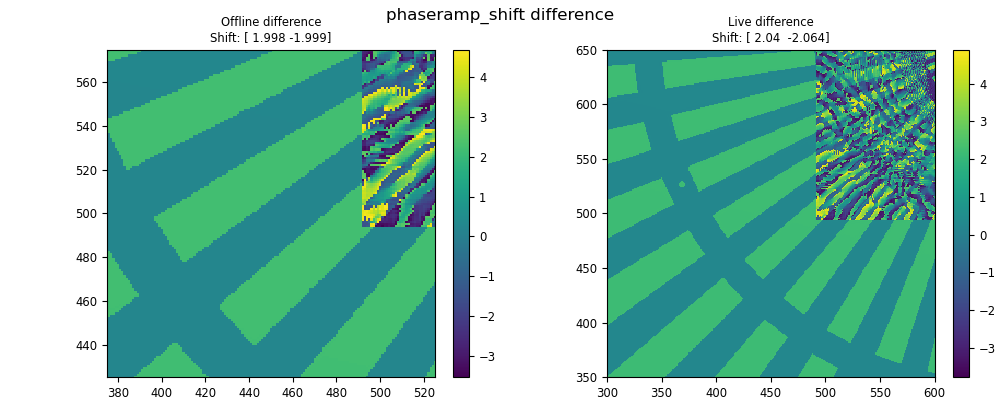

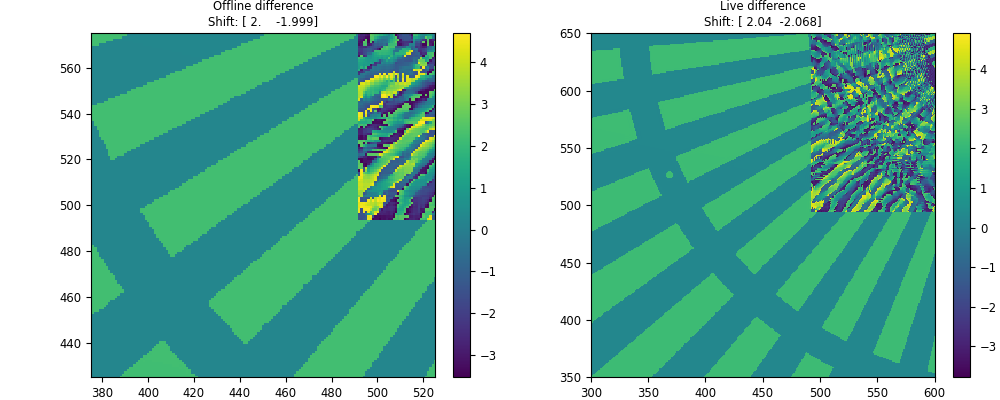

In [20]:
shift2offline = np.array([1.998,  -1.999]) # orginal: [2.03,  -2.02]
shift2live = np.array([2.04,  -2.064])
# diff1_phaseramp = obj_phaseramp - shift(obj1_phaseramp, shift2offline)
# diff2_phaseramp = obj_phaseramp - shift(obj2_phaseramp, shift2live)
diff1_phaseramp = shift(obj_phaseramp, -shift2offline/2) - shift(obj1_phaseramp, shift2offline/2)
diff2_phaseramp = shift(obj_phaseramp, -shift2live/2) - shift(obj2_phaseramp, shift2live/2)

fig6, axs = plt.subplots(nrows=1, ncols=2, figsize=(4 * 2.5, 4),tight_layout={'pad': 0.0})
# fig6.subplots_adjust(left=0.03, bottom=0.07, right=0.95, top=0.9, wspace=0.40, hspace=0.2)
# fig6.subplots_adjust(left=0.03, bottom=0.01, right=0.95, top=0.99, wspace=0.20, hspace=0.2)
subfig18 = axs[0].imshow((diff1_phaseramp), origin='lower', interpolation='None')
subfig19 = axs[1].imshow((diff2_phaseramp), origin='lower', interpolation='None')
plt.colorbar(subfig18, ax=axs[0], fraction=0.046, pad=0.04)
plt.colorbar(subfig19, ax=axs[1], fraction=0.046, pad=0.04)
plt.setp(axs[0], title=f'Offline difference\nShift: {shift2offline}')
plt.setp(axs[1], title=f'Live difference\nShift: {shift2live}')
fig6.suptitle('phaseramp_shift difference')


shift2offline = np.array([2.0, -1.999])
shift2live = np.array([2.04,  -2.068])
#diff1_phaseramp = obj_phaseramp - shift(obj1_phaseramp, shift2offline)
#diff2_phaseramp = obj_phaseramp - shift(obj2_phaseramp, shift2live)
diff1_phaseramp = shift(obj_phaseramp, -shift2offline/2) - shift(obj1_phaseramp, shift2offline/2)
diff2_phaseramp = shift(obj_phaseramp, -shift2live/2) - shift(obj2_phaseramp, shift2live/2)

fig7, axs = plt.subplots(nrows=1, ncols=2, figsize=(4 * 2.5, 4),tight_layout={'pad': 0.0})
#fig7.subplots_adjust(left=0.03, bottom=0.01, right=0.95, top=0.99, wspace=0.20, hspace=0.99)
subfig20 = axs[0].imshow((diff1_phaseramp), origin='lower', interpolation='None')
subfig21 = axs[1].imshow((diff2_phaseramp), origin='lower', interpolation='None')
plt.colorbar(subfig20, ax=axs[0], fraction=0.046, pad=0.04)
plt.colorbar(subfig21, ax=axs[1], fraction=0.046, pad=0.04)
plt.setp(axs[0], title=f'Offline difference\nShift: {shift2offline}')
plt.setp(axs[1], title=f'Live difference\nShift: {shift2live}')
#fig7.suptitle('phaseramp_shift difference')

z=75
subfig18.axes.set_xlim(300+z, 600-z)
subfig18.axes.set_ylim(350+z, 650-z)
subfig19.axes.set_xlim(300, 600)
subfig19.axes.set_ylim(350, 650)
subfig20.axes.set_xlim(300+z, 600-z)
subfig20.axes.set_ylim(350+z, 650-z)
subfig21.axes.set_xlim(300, 600)
subfig21.axes.set_ylim(350, 650)

sliders = []
for val, subfig in enumerate([subfig18, subfig19, subfig20, subfig21]):
    slider, arr, subfig = add_slider(subfig.get_array().data, subfig, init_slider_value=0.3)#slider_values[scan][val])
    sliders.append((slider, arr, subfig))
    slider.observe(update, names='value')

ui3 = widgets.HBox([slider for slider, _, _ in sliders])
display(ui3)

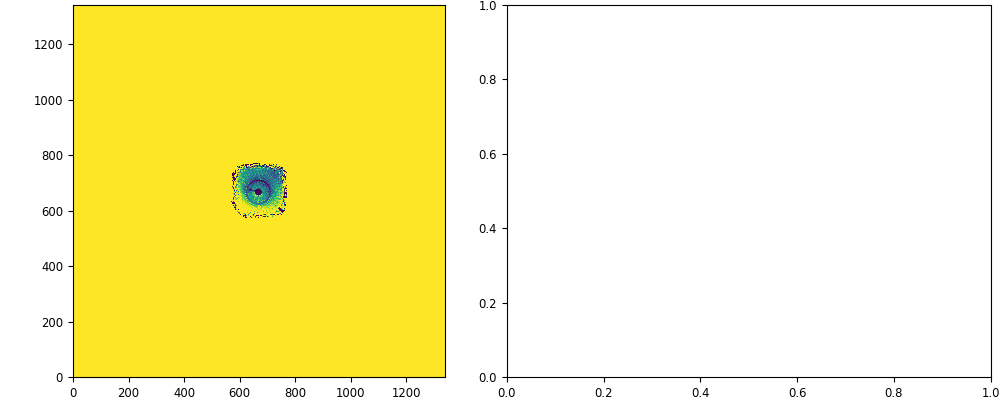

In [41]:
fig7, axs = plt.subplots(nrows=1, ncols=2, figsize=(4 * 2.5, 4),tight_layout={'pad': 0.0})
#fig7.subplots_adjust(left=0.03, bottom=0.01, right=0.95, top=0.99, wspace=0.20, hspace=0.99)
subfig20 = axs[0].imshow(((obj_phaseramp_unwrapped - np.mean(obj_phaseramp_unwrapped[marg:-marg, marg:-marg])) - (obj1_phaseramp_unwrapped_pad - np.mean(obj1_phaseramp_unwrapped_pad[marg:-marg, marg:-marg]))), origin='lower', interpolation='None', vmin=-0.2, vmax=0.2)

<h4>Translation shift sliders</h4>

289


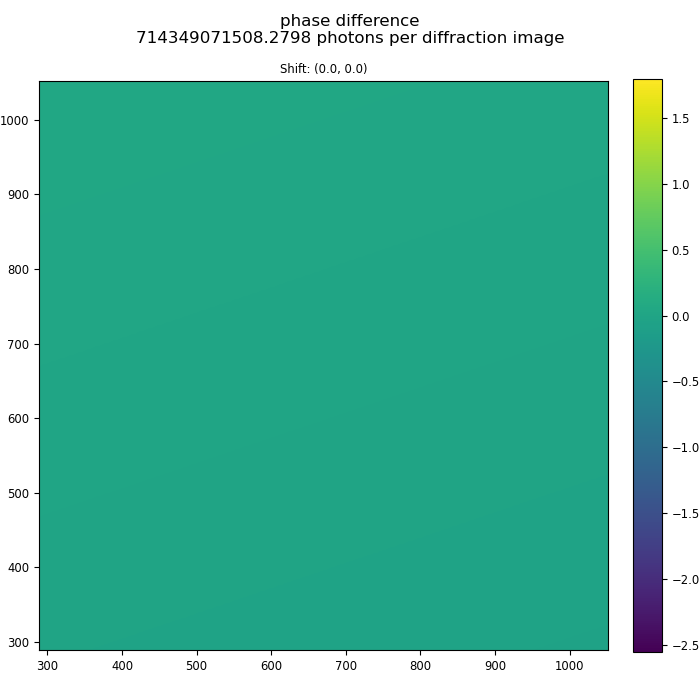

In [49]:
marg= ((min(sh)-max(sh1))//2) + int(max(sh1)//8)
# Plot with shift sliders

obj_phaseramp_ = obj_phaseramp_unwrapped#obj_abs
obj1_phaseramp_ = obj2_phaseramp_unwrapped_pad#obj1_abs#obj1_phaseramp_unwrapped
whatdata = 'phase'#ramp_unwrapped' # 'phaseramp'
obj_phaseramp_ = obj_phaseramp_ - np.mean(obj_phaseramp_[marg:-marg, marg:-marg])
obj1_phaseramp_ = obj1_phaseramp_ - np.mean(obj1_phaseramp_[marg:-marg, marg:-marg])

# Initialize shift values
shift1_x = 2.038  # 1.998 (for obj1_phaseramp)    # '15' offline 
shift1_y = -2.029  # -1.999 (for obj1_phaseramp)  # '15' offline 
# shift1_x = 2.037 # 1.997 (for obj2_phaseramp)   # '15' live  
# shift1_y = -2.12 # -1.990 (for obj2_phaseramp)  # '15' live 
# shift1_x = 1.34    # '16' live
# shift1_y = -2.10   # '16' live
# shift1_x = 2.02    # '17' live
# shift1_y = -2.02   # '17' live
# shift1_x = 1.77    # '18' live
# shift1_y = -1.46   # '18' live
shift1_x = 1.98    # '19'00 offline
shift1_y = -2.05   # '19'00 offline 
# shift1_x = 0.00    # '19'01 offline
# shift1_y = 0.02   # '19'01 offline 
shift1_x = shift2offline[0]#0.04    # testing offline
shift1_y = shift2offline[1]#-0.01   # 'testing offline 


# Compute the shifted image
diff1_phaseramp_ = (shift(obj_phaseramp_, [-shift1_x/2, -shift1_y/2]) - shift(obj1_phaseramp_, [shift1_x/2, shift1_y/2])) #/ shift(obj_phaseramp_, [-shift1_x/2, -shift1_y/2])
#diff1_phaseramp_[diff1_phaseramp_ < 0] += 2*np.pi
#diff1_phaseramp_[diff1_phaseramp_ > 0] -= 2*np.pi
diff1_phaseramp_[diff1_phaseramp_ < np.pi] += 2*np.pi
diff1_phaseramp_[diff1_phaseramp_ > np.pi] -= 2*np.pi
# Create figure and axes
fig8, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 7), tight_layout={'pad': 0.0})
subfigX = axs.imshow(diff1_phaseramp_, origin='lower', interpolation='None')
plt.colorbar(subfigX, ax=axs, fraction=0.046, pad=0.04)
plt.setp(axs, title=f'Shift: ({shift1_x}, {shift1_y})')
fig8.suptitle(f'{whatdata} difference\n{mean_photons1} photons per diffraction image')

z=100
M, N = obj.shape
# subfigX.axes.set_xlim(M//2 - z, M//2 + z)
# subfigX.axes.set_ylim(N//2 - z, N//2 + z)


# Function to update the plot when sliders are moved
def update_plot(change):
    # Update shift values from slider values
    shift1_x = x_slider.value
    shift1_y = y_slider.value
    
    # Compute the shifted image
    diff1_phaseramp_ = (shift(obj_phaseramp_, [-shift1_x/2, -shift1_y/2]) - shift(obj1_phaseramp_, [shift1_x/2, shift1_y/2])) #/ shift(obj_phaseramp_, [-shift1_x/2, -shift1_y/2])
    
    # Update image data
    subfigX.set_data(diff1_phaseramp_)
    
    # Update title with new shift values
    plt.setp(axs, title=f'Shift: ({shift1_x}, {shift1_y})')

# Create FloatSlider widgets for x and y shifts
x_slider = widgets.FloatSlider(value=shift1_x, min=shift1_x-0.9, max=shift1_x+0.9, step=0.01, description='shift1_x', layout=widgets.Layout(width='90%'), readout_format='.3f')
y_slider = widgets.FloatSlider(value=shift1_y, min=shift1_y-0.9, max=shift1_y+0.9, step=0.01, description='shift1_y', layout=widgets.Layout(width='90%'), readout_format='.3f')

# Observe slider changes and call update_plot function
x_slider.observe(update_plot, names='value')
y_slider.observe(update_plot, names='value')

# Display the sliders
display(widgets.VBox([x_slider, y_slider]))
#marg= ((min(sh)-max(sh1))//2) +(max(sh1)//4)#460
sliders = []
for val, subfig in enumerate([subfigX]):
    slider, arr, subfig = add_slider(subfig.get_array().data, subfig, init_slider_value=1.8)#slider_values[scan][val])
    sliders.append((slider, arr, subfig))
    slider.observe(update, names='value')

ui3 = widgets.HBox([slider for slider, _, _ in sliders])
display(ui3)

subfigX.axes.set_ylim(marg, sh[0]-marg)
subfigX.axes.set_xlim(marg, sh[1]-marg)#[marg:-marg,marg:-marg]
print(marg)
# z=100
# M, N = obj.shape
# subfigX.axes.set_xlim(M//2 - z, M//2 + z)
# subfigX.axes.set_ylim(N//2 - z, N//2 + z)

In [254]:
fig8.savefig(fname2.rsplit('/', 2)[0] + f'/{whatdata}{lable}_shift-manual.png')

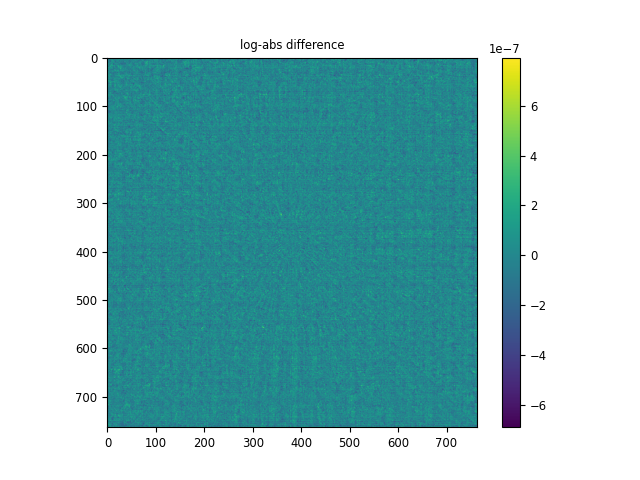

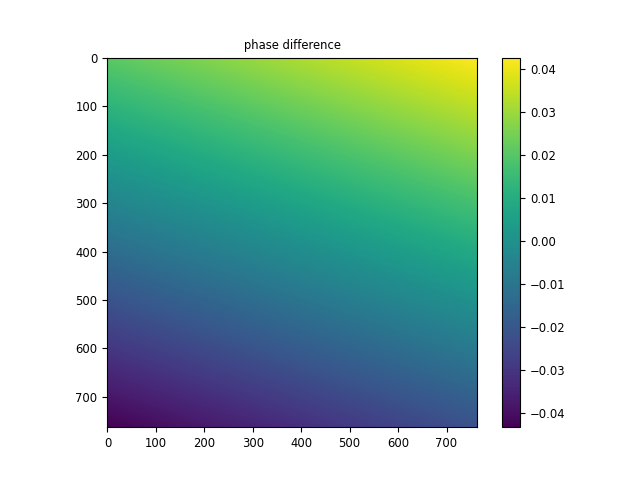

min/max phase_error -0.043393345997229105 0.042651346032326565


In [52]:
# Filipes error calculations
obj1_pad = np.pad(obj1, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
obj1_ = obj1_ramp_pad[marg:-marg,marg:-marg]
obj2_pad = np.pad(obj2, ((padrow,sh[0]-padrow-sh1[0]),(padcol,sh[1]-padcol-sh1[1])))
obj2_ = obj2_pad[marg:-marg,marg:-marg]
obj_GT = obj[marg:-marg,marg:-marg]

from skimage.registration import phase_cross_correlation
shift00,_,phase_shift = phase_cross_correlation(obj_GT, obj1_)

from matplotlib import pyplot as plt
# plt.imshow(np.abs(probe))
# plt.show()
# plt.imshow(np.abs(obj1_))
# plt.show()

# Scale the reconstruction to the solution
obj1_ *= np.mean(np.abs(obj_GT)/np.abs(obj1_))

plt.figure()
plt.imshow(np.log(np.abs(obj1_))-np.log(np.abs(obj_GT)))#,vmin=-1,vmax=1)
plt.title('log-abs difference')
plt.colorbar()
plt.show()

plt.figure()
phase_error = np.angle(obj1_*np.exp(1.0j*phase_shift))-np.angle(obj_GT)
phase_error[phase_error < np.pi] += 2*np.pi
phase_error[phase_error > np.pi] -= 2*np.pi
plt.imshow(phase_error)#,vmin=-1,vmax=1)
plt.title('phase difference')
plt.colorbar()
plt.show()


print('min/max phase_error', np.min(phase_error), np.max(phase_error))
# 48(DM1000): min/max phase_error -0.003119856395642273 0.005158036670763977
# 49(DM5000): min/max phase_error -1.1029624147340655e-06 3.375298547325656e-06
# 49(DM4000): min/max phase_error -1.5797995729371905e-06 3.926641511498019e-06
# 49(DM3000): min/max phase_error -1.1029624147340655e-06 3.0325718398671597e-06
# 49(DM2000): min/max phase_error -8.25551978778094e-06 1.3254768418846652e-05

In [57]:
np.min(diff1_phaseramp_), np.max(diff1_phaseramp_)


print('min/max obj_abs'.ljust(35), np.min(obj_abs),'  ,  ', np.max(obj_abs))
print('min/max obj_ramp'.ljust(35), np.min(obj_ramp),'  ,  ', np.max(obj_ramp))
print('min/max obj_rmramp_abs'.ljust(35), np.min(obj_rmramp_abs),'  ,  ', np.max(obj_rmramp_abs))
print('min/max obj_rmramp_abslog'.ljust(35), np.min(obj_rmramp_abslog),'  ,  ', np.max(obj_rmramp_abslog))
print('min/max obj_phase'.ljust(35), np.min(obj_phase),'  ,  ', np.max(obj_phase))
print('min/max obj_phaseramp'.ljust(35), np.min(obj_phaseramp),'  ,  ', np.max(obj_phaseramp))
print('min/max obj_phaseramp_unwrapped'.ljust(35), np.min(obj_phaseramp_unwrapped),'  ,  ', np.max(obj_phaseramp_unwrapped))
print('')
print('min/max obj1_abs'.ljust(35), np.min(obj1_abs),'  ,  ', np.max(obj1_abs))
print('min/max obj1_ramp'.ljust(35), np.min(obj1_ramp),'  ,  ', np.max(obj1_ramp))
print('min/max obj1_rmramp_abs'.ljust(35), np.min(obj1_rmramp_abs),'  ,  ', np.max(obj1_rmramp_abs))
print('min/max obj1_rmramp_abslog'.ljust(35), np.min(obj1_rmramp_abslog),'  ,  ', np.max(obj1_rmramp_abslog))
print('min/max obj1_phase'.ljust(35), np.min(obj1_phase),'  ,  ', np.max(obj1_phase))
print('min/max obj1_phaseramp'.ljust(35), np.min(obj1_phaseramp),'  ,  ', np.max(obj1_phaseramp))
print('min/max obj1_phaseramp_unwrapped'.ljust(35), np.min(obj1_phaseramp_unwrapped),'  ,  ', np.max(obj1_phaseramp_unwrapped))

min/max obj_abs                     0.6642867805861816   ,   0.9931665930901021
min/max obj_ramp                    (-0.4092931609315916+0.5232170059126328j)   ,   (0.9673194734832165+0.22510645892633405j)
min/max obj_rmramp_abs              0.6642867805861814   ,   0.9931665930901024
min/max obj_rmramp_abslog           -0.40904132427383777   ,   -0.00685686154601265
min/max obj_phase                   0.2286422176293854   ,   2.1637174191855593
min/max obj_phaseramp               0.2286422176293854   ,   2.2346278951461147
min/max obj_phaseramp_unwrapped     0.2286422176293854   ,   2.2346278951461147

min/max obj1_abs                    0.0   ,   1.0000001
min/max obj1_ramp                   (-1.0000000066968424-7.032923460969804e-05j)   ,   (1.0000000049735687-0.00014478834393388818j)
min/max obj1_rmramp_abs             0.0   ,   1.0000000772432827
min/max obj1_rmramp_abslog          -5.276018508083335   ,   7.724327967574972e-08
min/max obj1_phase                  -3.1415703   ,   

0.6642867805861816 0.9931665930901021
0.2286422176293854 2.1637174191855593


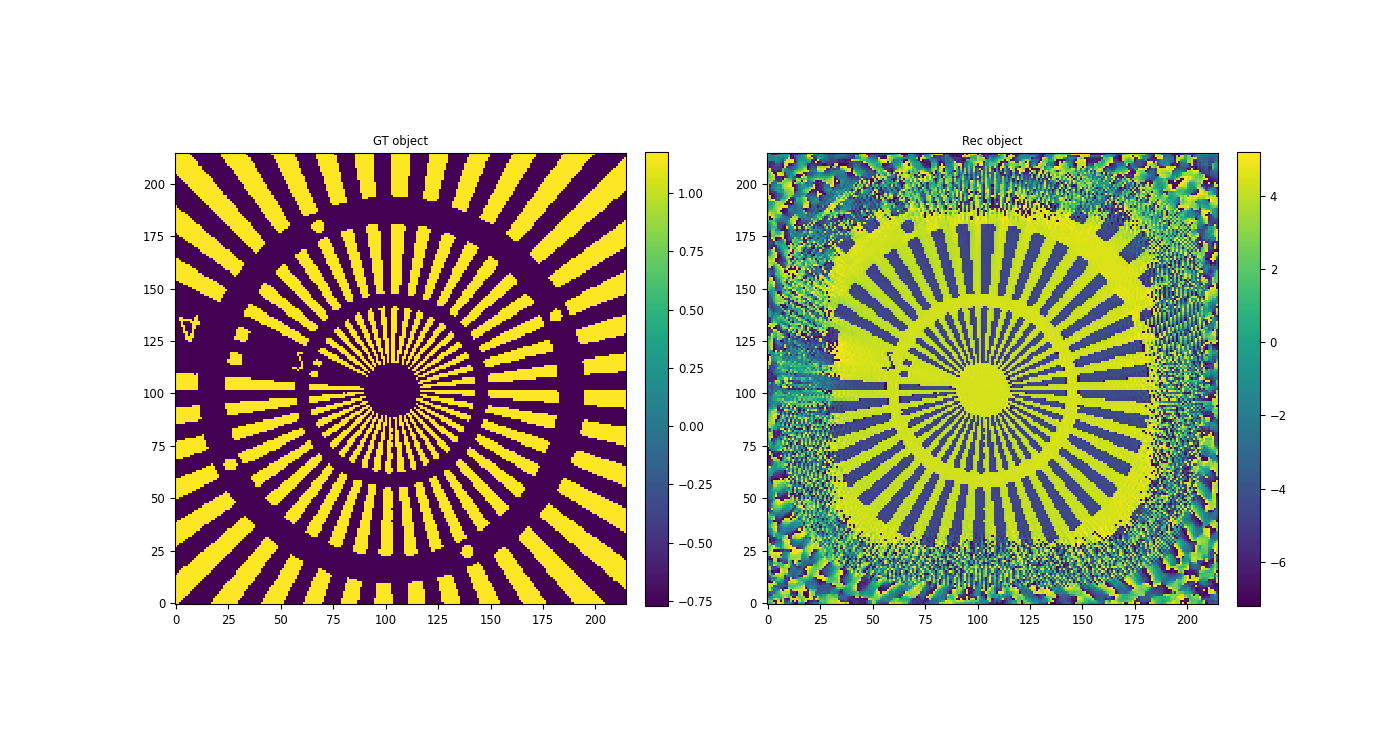

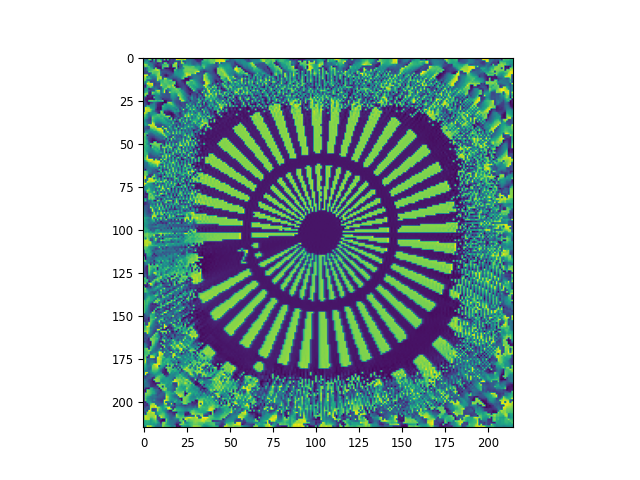

In [58]:
marg= ((min(sh)-max(sh1))//2) +(max(sh1)//5)
normalize = np.mean(obj_phase[marg:-marg,marg:-marg])
normalize1 = np.mean(obj1_phase[marg:-marg,marg:-marg])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7 * 2, 7.5))
#fig5.subplots_adjust(left=0.03, bottom=0.07, right=0.95, top=0.95, wspace=0.40, hspace=0.2)
subfig14 = axs[0].imshow((obj_phase[marg:-marg,marg:-marg]-normalize)/normalize, origin='lower', interpolation='None')#, vmin=950, vmax=1050)#norm=mpl.colors.LogNorm(vmin=2.27e-02))
subfig15 = axs[1].imshow((obj1_phase_pad[marg:-marg,marg:-marg]-normalize1)/normalize1, origin='lower', interpolation='None')#, vmin=950, vmax=1050)
plt.setp(axs[0], title='GT object')
plt.setp(axs[1], title='Rec object')
plt.colorbar(subfig14, ax=axs[0], fraction=0.046, pad=0.04)
plt.colorbar(subfig15, ax=axs[1], fraction=0.046, pad=0.04)
print(np.min(obj_abs), np.max(obj_abs))
print(np.min(obj_phase), np.max(obj_phase))
plt.figure()
plt.imshow(((obj_phase[marg:-marg,marg:-marg]-normalize)/normalize) - ((obj1_phase_pad[marg:-marg,marg:-marg]-normalize1)/normalize1))

In [59]:
wafGT = 0.229
sampGT = 2.16
waf = 2.8
samp = -1.65
sampGT-wafGT, (samp+2*3.1415)-waf

(1.931, 1.833000000000001)

In [ ]:
fig5, axs = plt.subplots(nrows=1, ncols=3, figsize=(3 * 5, 3))
fig5.subplots_adjust(left=0.03, bottom=0.07, right=0.95, top=0.9, wspace=0.40, hspace=0.2)
subfig18 = axs[0].imshow((np.angle(u.rebin_2d(pr, 2)[0]) - np.angle(pr1)), origin='lower')#norm=mpl.colors.LogNorm(vmin=2.27e-02))
subfig19 = axs[1].imshow((np.angle(u.rebin_2d(pr, 2)[0]) - np.angle(pr2)), origin='lower')
subfig20 = axs[2].imshow((np.angle(pr1) - np.angle(pr2)), origin='lower')
plt.colorbar(subfig18, ax=axs[0], fraction=0.046, pad=0.04)
plt.colorbar(subfig19, ax=axs[1], fraction=0.046, pad=0.04)
plt.colorbar(subfig20, ax=axs[2], fraction=0.046, pad=0.04)
plt.setp(axs[0], title='probe-probe1')
plt.setp(axs[1], title='probe-probe2')
plt.setp(axs[2], title='probe1-probe2')


# sliders = []
# for val, subfig in enumerate([subfig18, subfig19, subfig20]): 
#     slider, arr, subfig = add_slider(subfig.get_array().data, subfig, init_slider_value=2)
#     sliders.append((slider, arr, subfig))
#     slider.observe(update, names='value')

# ui4 = widgets.HBox([slider for slider, _, _ in sliders])
# display(ui4)

In [ ]:
fig5, axs = plt.subplots(nrows=1, ncols=3, figsize=(3 * 5, 3))
fig5.subplots_adjust(left=0.03, bottom=0.07, right=0.95, top=0.9, wspace=0.40, hspace=0.2)
subfig18 = axs[0].imshow((np.log(np.abs(u.rebin_2d(pr, 2)[0])) - np.log(np.abs(pr1))), origin='lower')
subfig19 = axs[1].imshow((np.abs(u.rebin_2d(pr, 2)[0]) - np.log(np.abs(pr2))), origin='lower')
subfig20 = axs[2].imshow((np.abs(pr1) - np.abs(pr2)), origin='lower', norm=mpl.colors.LogNorm(vmin=2.27e-02))
plt.colorbar(subfig18, ax=axs[0], fraction=0.046, pad=0.04)
plt.colorbar(subfig19, ax=axs[1], fraction=0.046, pad=0.04)
plt.colorbar(subfig20, ax=axs[2], fraction=0.046, pad=0.04)

In [ ]:
# marg = 500
# shift2, error, phasediff = phase_cross_correlation(u.rebin_2d(obj_abslog[:3724,:3724], 2)[0][marg:-marg,marg:-marg], obj1_abslog[:,:1862][marg:-marg,marg:-marg], upsample_factor=1000)#, normalization=None)
# shift2 # Live: array([ 1.875, -4.835]), 4.076, -3.982, 4.076, -3.952 ##Offline:array([ 4.026, -3.672]), norm=None: array([ 4.023, -3.611])

marg = 500
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_abslog[marg:-marg,marg:-marg], obj1_abslog[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')
shift2live, error2, phasediff2    = phase_cross_correlation(obj_abslog[marg:-marg,marg:-marg], obj2_abslog[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}')

In [ ]:
    # upsample_factor=1,
    # space='real', # "real" or "fourier"
    # disambiguate=False,
    # return_error=True,
    # overlap_ratio=0.3,
    # normalization='phase', # {"phase", None}
marg = 500
shift2offline, error1, phasediff1 = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj1[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')
shift2live, error2, phasediff2    = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj2[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}')

In [ ]:
shift2offline, error1, phasediff1 = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj1[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization='phase')
shift2live, error2, phasediff2    = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj2[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization='phase')

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}')

In [ ]:
shift2offline, error1, phasediff1 = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj1[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization=None)
shift2live, error2, phasediff2    = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj2[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization=None)

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}')

In [ ]:
# obj_abslog
# obj_phase
# obj_phaseramp
# obj_phaseramp_unwrapped
print("space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase'\n_______________________________________________________________________")
print('obj')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj1[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase') # little to much
shift2live, error2, phasediff2    = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj2[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase') # to little

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('*obj_ramp')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_ramp[marg:-marg,marg:-marg], obj1_ramp[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase') # little to much
shift2live, error2, phasediff2    = phase_cross_correlation(obj_ramp[marg:-marg,marg:-marg], obj2_ramp[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase') # to little

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')

print('*obj_abslog')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_abslog[marg:-marg,marg:-marg], obj1_abslog[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase') # little to much
shift2live, error2, phasediff2    = phase_cross_correlation(obj_abslog[marg:-marg,marg:-marg], obj2_abslog[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase') # to little
print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')

print('*obj_rmramp_abslog')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_rmramp_abslog[marg:-marg,marg:-marg], obj1_rmramp_abslog[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase') # little to much
shift2live, error2, phasediff2    = phase_cross_correlation(obj_rmramp_abslog[marg:-marg,marg:-marg], obj2_rmramp_abslog[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase') # to little
print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phase')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phase[marg:-marg,marg:-marg], obj1_phase[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phase[marg:-marg,marg:-marg], obj2_phase[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phaseramp')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], obj1_phaseramp[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], obj2_phaseramp[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phaseramp_unwrapped')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phaseramp_unwrapped[marg:-marg,marg:-marg], obj1_phaseramp_unwrapped[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phaseramp_unwrapped[marg:-marg,marg:-marg], obj2_phaseramp_unwrapped[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')

In [ ]:
print('obj_phaseramp shifted')
marg=150
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], obj1_phaseramp[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], obj2_phaseramp[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')

print(f'shift2offline: {shift2offline}, error: {error1}, phasediff: {phasediff1}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')
##########
shift2offline = np.array([2.0, -1.995])
shift2live = np.array([ 2.04+0.01+0.003,  -2.064-0.018-0.007]) # 1.995, -1.975
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], shift(obj1_phaseramp, shift2offline)[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], shift(obj2_phaseramp, shift2live)[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')

print(f'shift2offline: {shift2offline}, error: {error1}, phasediff: {phasediff1}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')
#1.995+0.031+0.011, -1.975-0.06-0.023...(2.037, -2.058)
2.04+0.01+0.003,  -2.064-0.018-0.007

In [ ]:
print("space='real', disambiguate=False, overlap_ratio=0.3, normalization=None\n_______________________________________________________________________")
print('obj')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj1[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization=None)
shift2live, error2, phasediff2    = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj2[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization=None)

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('*obj_ramp')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_ramp[marg:-marg,marg:-marg], obj1_ramp[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization=None) # little to much
shift2live, error2, phasediff2    = phase_cross_correlation(obj_ramp[marg:-marg,marg:-marg], obj2_ramp[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization=None) # to little

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phase')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phase[marg:-marg,marg:-marg], obj1_phase[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization=None)
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phase[marg:-marg,marg:-marg], obj2_phase[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization=None)

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phaseramp')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], obj1_phaseramp[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization=None)
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], obj2_phaseramp[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization=None)

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phaseramp_unwrapped')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phaseramp_unwrapped[marg:-marg,marg:-marg], obj1_phaseramp_unwrapped[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization=None)
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phaseramp_unwrapped[marg:-marg,marg:-marg], obj2_phaseramp_unwrapped[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization=None)

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')

In [ ]:
olr = 0.3
marg=150
print(f"space='real', disambiguate=False, overlap_ratio={olr}, normalization=None\n_______________________________________________________________________")
print('obj')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj1[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=olr, normalization=None)
shift2live, error2, phasediff2    = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj2[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=olr, normalization=None)

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phase')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phase[marg:-marg,marg:-marg], obj1_phase[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=olr, normalization=None)
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phase[marg:-marg,marg:-marg], obj2_phase[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=olr, normalization=None)

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phaseramp')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], obj1_phaseramp[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=olr, normalization=None)
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], obj2_phaseramp[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=olr, normalization=None)

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phaseramp_unwrapped')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phaseramp_unwrapped[marg:-marg,marg:-marg], obj1_phaseramp_unwrapped[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=olr, normalization=None)
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phaseramp_unwrapped[marg:-marg,marg:-marg], obj2_phaseramp_unwrapped[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=olr, normalization=None)

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')

In [ ]:
print("space='fourier', disambiguate=False, overlap_ratio=0.3, normalization='phase'\n_______________________________________________________________________")
print('obj')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj1[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization='phase')
shift2live, error2, phasediff2    = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj2[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization='phase')

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phase')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phase[marg:-marg,marg:-marg], obj1_phase[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization='phase')
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phase[marg:-marg,marg:-marg], obj2_phase[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization='phase')

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phaseramp')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], obj1_phaseramp[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization='phase')
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], obj2_phaseramp[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization='phase')

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phaseramp_unwrapped')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phaseramp_unwrapped[marg:-marg,marg:-marg], obj1_phaseramp_unwrapped[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization='phase')
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phaseramp_unwrapped[marg:-marg,marg:-marg], obj2_phaseramp_unwrapped[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization='phase')

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')

In [ ]:
print("space='fourier', disambiguate=False, overlap_ratio=0.3, normalization=None\n_______________________________________________________________________")
print('obj')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj1[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization=None)
shift2live, error2, phasediff2    = phase_cross_correlation(obj[marg:-marg,marg:-marg], obj2[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization=None)

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phase')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phase[marg:-marg,marg:-marg], obj1_phase[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization=None)
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phase[marg:-marg,marg:-marg], obj2_phase[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization=None)

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phaseramp')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], obj1_phaseramp[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization=None)
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], obj2_phaseramp[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization=None)

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')


print('obj_phaseramp_unwrapped')
shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phaseramp_unwrapped[marg:-marg,marg:-marg], obj1_phaseramp_unwrapped[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization=None)
shift2live, error2, phasediff2    = phase_cross_correlation(obj_phaseramp_unwrapped[marg:-marg,marg:-marg], obj2_phaseramp_unwrapped[marg:-marg,marg:-marg], upsample_factor=1000, space='fourier', disambiguate=False, overlap_ratio=0.3, normalization=None)

print(f'shift2offline: {shift2offline}, error: {error2}, phasediff: {phasediff2}')
print(f'live2shift:    {shift2live}, error: {error2}, phasediff: {phasediff2}\n')

<h2>Plot trajectory</h2>

3.9725552495033214e-05


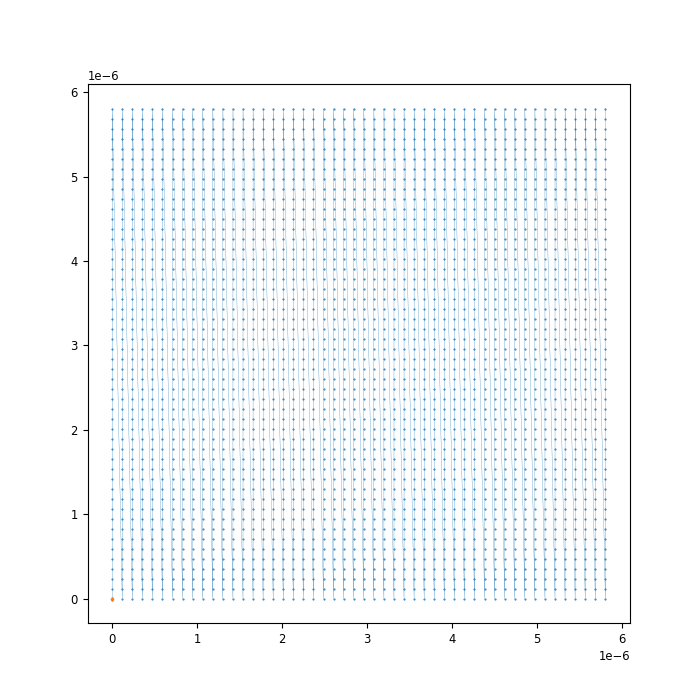

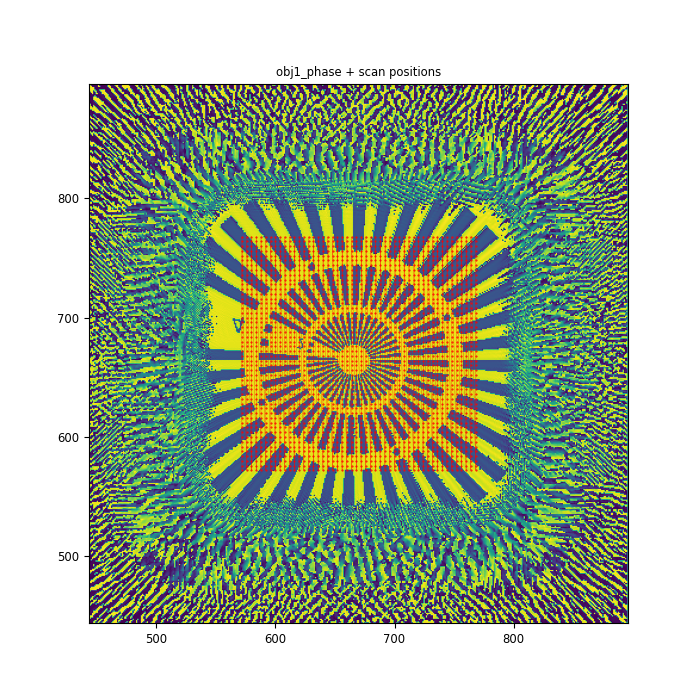

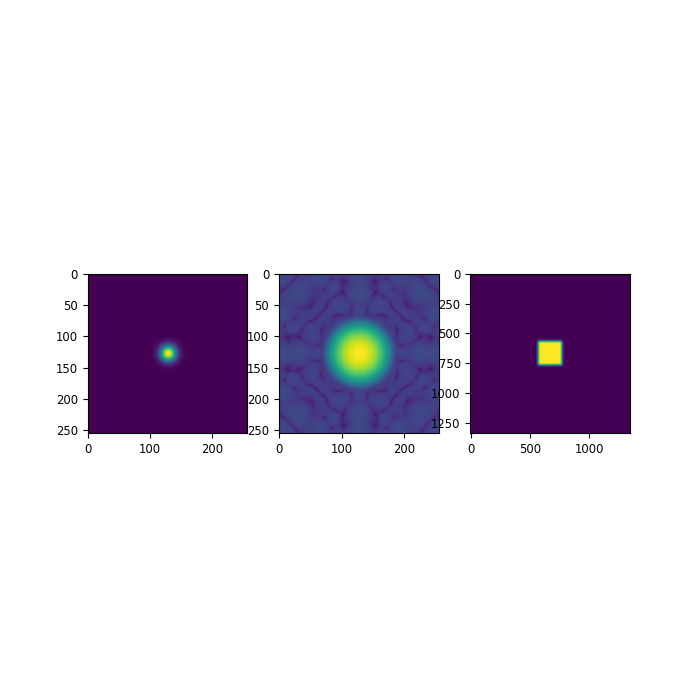

In [28]:
def get_pos(fname):
    """Get the positions from chunked ptyd files"""
    with h5py.File(fname, 'r') as f:
        nrchunks = len(f['chunks'].keys())
        pos = np.array([[],[]]).T
        for k in range(nrchunks):
            pos = np.concatenate((pos, f['chunks'][str(k)]['positions'][:]))
    return pos

# Plot positions
def plot_pos(pos):
    plt.figure(figsize=(7,7))
    plt.plot(pos[:,0], pos[:,1], '.-', markersize=1, linewidth=0.2)
    plt.plot(pos[0,0], pos[0,1], 'd', markersize=2)
    plt.show()
    
# Get the fnames of files containing the positions:
fname1_pos = glob.glob(fname1.rsplit('/',2)[0] + '/data/*.ptyd')[0]
fname2_pos = glob.glob(fname2.rsplit('/',2)[0] + '/data/*.ptyd')[0]
#fname3_pos = glob.glob(fname3.rsplit('/',2)[0] + '/data/*.ptyd')[0]
# Get the positions
pos1 = get_pos(fname1_pos)
pos2 = get_pos(fname2_pos)
#pos3 = get_pos(fname3_pos)
pos1_ = get_pos('/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_data/NTT_1190_256px_08_testing2_with_init_sample/data/data_scan_001190.ptyd')

print(obj1_psize*obj1_phase.shape[0])

#(pos1 == pos1_).all()
plot_pos(pos1)
#plt.plot(pos1[:,0], pos1[:,1], '.-', markersize=1, linewidth=0.2)
#plt.plot([0, 50*50e-9], [0,50*50e-9])

# # Plot positions
# plt.figure(figsize=(7,7))
# plt.plot(pos1_[:,0], pos1_[:,1], '.-', markersize=1, linewidth=0.2)
# plt.plot(pos1_[0,0], pos1_[0,1], 'd', markersize=2)
# plt.show()
# print(pos1.shape, pos2.shape, pos3.shape)


#plt.figure(figsize=(7,7))
figTraj, ax = plt.subplots(figsize=(7,7))
steps = 50
stepsize = 3*obj1_psize
subfigTraj = ax.imshow(obj1_phase)
#plt.xticks([0, steps*stepsize])
#plt.yticks([0, steps*stepsize])
move_pos = (np.array(obj1_phase.shape) // 2) - (np.round(pos1[-1,:]/obj1_psize) // 2) # the vector that moves positions to the center of the object
ax.plot(move_pos[0] + pos1[:,0]/(obj1_psize), move_pos[1] + pos1[:,1]/(obj1_psize), 'r.-', markersize=1, linewidth=0.2)
plt.title('obj1_phase + scan positions')
subfigTraj.axes.set_ylim(padcol, padcol+sh1[0])
subfigTraj.axes.set_xlim(padrow, padrow+sh1[1])
figTraj.savefig(fname1.rsplit('/', 2)[0] + f'/phase_and_positions{samplename[scan]}.png')


# plot probe
probe_illum = np.zeros_like(obj1_phase)
positions = np.round(np.array([move_pos[0] + pos1[:,0]/(obj1_psize), move_pos[1] + pos1[:,1]/(obj1_psize)]))
def makeGaussian(size, fwhm = 3, center=None):
    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]
    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]
    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

gsize=256
for k in range(len(positions[0,:])):
    probe_illum[int(positions[1,k]-gsize//2):int(positions[1,k]+gsize//2), int(positions[0,k]-gsize//2):int(positions[0,k]+gsize//2)] += np.abs(pr1)#makeGaussian(size=gsize, fwhm = 12, center=positions[:,k])
#probe_gaussian = makeGaussian(size=256, fwhm = 12, center=None)

fig, ax = plt.subplots(1,3,figsize=(7,7))
ax[0].imshow(np.abs(pr1))
ax[1].imshow(np.log(np.abs(pr1)))
ax[2].imshow(probe_illum)

In [148]:
from ptypy.core import xy
pos__ = xy.spiral_scan(dr=50e-9, r=100*50e-9/2, maxpts=None)
pos__ += np.random.rand(pos__.shape[0],pos__.shape[1])*50e-9 / 3
print(pos__.shape, pos1.shape)
print((pos1_ == pos__).all())

        # elif p.model == 'spiral':#1.5e-05, 100   , 50e-9
        #     e, l, s = _complete(p.extent, p.steps, p.spacing)
        #     pos = spiral_scan(s[0], e[0]/2)

# p.scans.scan_00.data.xy.model = 'spiral'#'raster'
# p.scans.scan_00.data.xy.spacing = 50e-9#50e-9
# p.scans.scan_00.data.xy.steps = 100

print(np.random.rand(pos__.shape[0],pos__.shape[1]).shape)

(7854, 2) (7854, 2)
False
(7854, 2)


___

<h2>Run</h2>

___

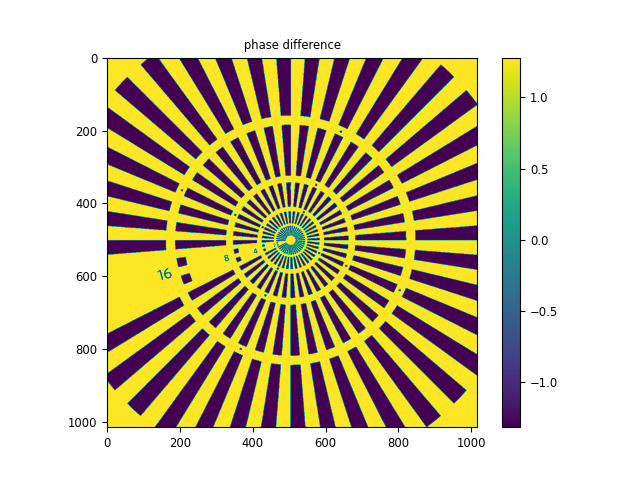

In [27]:
plt.imshow(np.abs(rmphaseramp(obj1_ramp, w1)))
plt.show()

In [374]:
# scan = '0'

# obj1, obj2, obj1_abs, obj2_abs, obj1_abslog, obj2_abslog, obj1_phase, obj2_phase, w1, w2, obj1_ramp, ramp1, obj2_ramp, ramp2, obj1_phaseramp, obj2_phaseramp, obj1_phaseramp_unwrapped, obj2_phaseramp_unwrapped, diff_abslog_od,, diff_phase, diff_phaseramp, diff_phaseramp_unwrapped, diff_phaseramp_unwrapped_ramp, shift1, error, phasediff

In [ ]:
print('obj1'.ljust(30), obj1.dtype)
print('obj1_abs'.ljust(30), str(obj1_abs.dtype).ljust(15), [np.min(obj1_abs), np.max(obj1_abs)])
print('obj1_abslog'.ljust(30), str(obj1_abslog.dtype).ljust(15), [np.min(obj1_abslog), np.max(obj1_abslog)])
print('obj1_phase'.ljust(30), str(obj1_phase.dtype).ljust(15), [np.min(obj1_phase), np.max(obj1_phase)])
print('w1'.ljust(30), w1.dtype)
print('obj1_ramp'.ljust(30), obj1_ramp.dtype)
print('ramp1'.ljust(30), ramp1.dtype)
print('obj1_phaseramp'.ljust(30), str(obj1_phaseramp.dtype).ljust(15), [np.min(obj1_phaseramp), np.max(obj1_phaseramp)])
print('obj1_phaseramp_unwrapped'.ljust(30), str(obj1_phaseramp_unwrapped.dtype).ljust(15), [np.min(obj1_phaseramp_unwrapped), np.max(obj1_phaseramp_unwrapped)])
# print(''.ljust(30), .dtype)
# print(''.ljust(30), .dtype)
# print(''.ljust(30), .dtype)



In [ ]:
plt.figure()
marg=130
std_factor = 1
#arr = angle_trunc(obj2_phase)#diff_phaseramp_unwrapped_shift
#arr = unwrap_phase(obj2_phase)
#arr = unwrap_phase(obj_phase)
#arr = rmphaseramp(obj2_phase)
#arr = obj2_phase
arr=(obj2_phase)#diff2_phaseramp
vmin = np.mean(arr[marg:-marg,marg:-marg]) - std_factor*np.std(arr[marg:-marg,marg:-marg])
vmax = np.mean(arr[marg:-marg,marg:-marg]) + std_factor*np.std(arr[marg:-marg,marg:-marg])
sh = np.max(arr.shape)
x = np.arange(sh)
plt.plot(x, np.ones(sh)*marg, 'r')
plt.plot(np.ones(sh)*marg, x, 'r')
plt.plot(x, sh-np.ones(sh)*marg, 'r')
plt.plot(sh-np.ones(sh)*marg, x, 'r')

img=plt.imshow(arr, origin='lower', vmin=-vmin, vmax=vmax)
# cdata = img.get_array().data.copy()
# cdata[np.where(cdata > 4)] = 0
# img.set_clim(set_vminvmax(cdata, std_factor))

plt.colorbar()
plt.title(f'min = {np.min(arr):.6f}, max = {np.max(arr):.6f}\nvmin = {vmin:.04f}, vmax = {vmax:.04f}')
plt.show()



In [ ]:
img.get_clim
cdata.shape
np.max()

In [ ]:
arr = unwrap_phase(obj2_phase)
print(obj2_phase[2314,19])
print(unwrap_phase(obj2_phase)[2314,19:20])#[7,1125:1133]
print(arr[2314,19:20])
print(obj2[2314,19])
print(np.angle(obj2[2314,19]))
print(np.abs(obj2[2314,19]))

In [ ]:
R1 = obj2[2314,19].real
I1 = obj2[2314,19].imag
L = np.sqrt(R1**2 + I1**2)
a1 = np.arcsin(I1/L) #  = np.arctan(I1/R1)

a2 = arr[2314,19:20][0]
I2 = L*np.sin(a2)
R2 = I2 / np.tan(a2)

In [ ]:
a = obj2
weight=None
return_phaseramp=False

In [ ]:
#############################
import numpy.core.numeric as _nx
z = asanyarray(z)
if issubclass(z.dtype.type, _nx.complexfloating):
    zimag = z.imag
    zreal = z.real
else:
    zimag = 0
    zreal = z

a = arctan2(zimag, zreal)
if deg:
    a *= 180/pi

##########################################################

# def phramp(a, weight=None, return_phaseramp=False):
#     """
#     Attempts to remove the phase ramp in a two-dimensional complex array ``a``.
#     """

useweight = True
if weight is None:
    useweight = False
elif isinstance(weight,str) and weight == 'abs':
    weight = np.abs(a)

ph = np.exp(1j*np.angle(a))
#ph = np.exp(1j*unwrap_phase(np.angle(a)))
[gx, gy] = np.gradient(ph)
gx = -np.real(1j*gx/ph)
gy = -np.real(1j*gy/ph)

if useweight:
    nrm = weight.sum()
    agx = (gx*weight).sum() / nrm
    agy = (gy*weight).sum() / nrm
else:
    agx = gx.mean()
    agy = gy.mean()

(xx, yy) = np.indices(a.shape)
p = np.exp(-1j*(agx*xx + agy*yy))

    # if return_phaseramp:
    #     return a*p, p
    # else:
    #     return a*p

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(3 * 5, 3))
axs[0].imshow(np.angle(obj2))
axs[1].imshow(np.angle(ph))
axs[2].imshow(gx)
axs[3].imshow(gy)
axs[4].imshow(np.angle(p))
axs[5].imshow(np.angle(a*p))
# axs[0].imshow()

In [ ]:
np.mean(diff2_phaseramp), np.std(diff2_phaseramp), np.min(diff2_phaseramp), np.max(diff2_phaseramp)


In [ ]:
np.mean(angle_trunc(diff2_phaseramp)), np.std(angle_trunc(diff2_phaseramp)), np.min(angle_trunc(diff2_phaseramp)), np.max(angle_trunc(diff2_phaseramp))


In [ ]:
diff2_phaserampp = angle_trunc(obj_phaseramp) - angle_trunc(shift(obj2_phaseramp, shift2live))
np.mean(diff2_phaserampp), np.std(diff2_phaserampp), np.min(diff2_phaserampp), np.max(diff2_phaserampp)

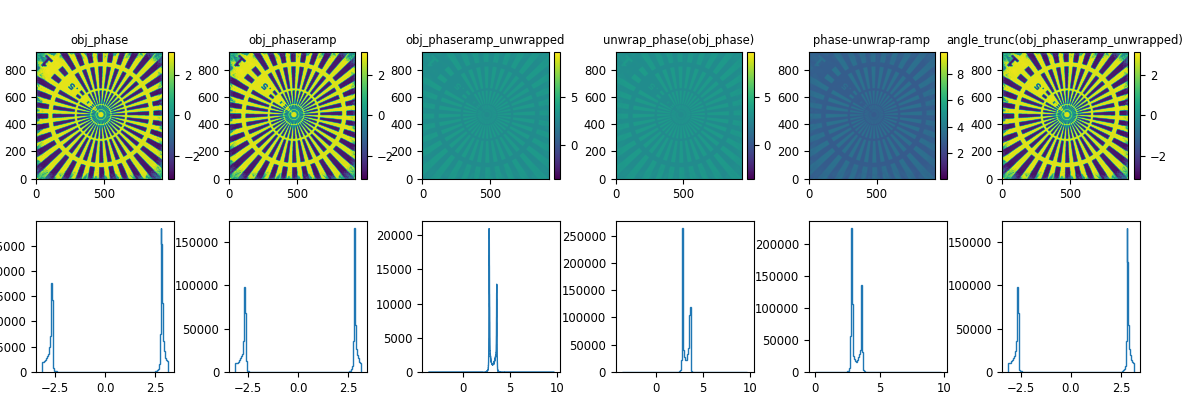

In [98]:
# GT histogram
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(2 * 6, 2*2))
fig.subplots_adjust(left=0.03, bottom=0.07, right=0.95, top=0.9, wspace=0.40, hspace=0.2)
subfig24 = axs[0,0].imshow(obj_phase, origin='lower')
subfig25 = axs[0,1].imshow(obj_phaseramp, origin='lower')
subfig26 = axs[0,2].imshow(obj_phaseramp_unwrapped, origin='lower')
subfig27 = axs[0,3].imshow(unwrap_phase(obj_phase), origin='lower')
subfig29 = axs[0,4].imshow(np.abs(rmphaseramp(unwrap_phase(obj_phase), w2)), origin='lower')
subfig30 = axs[0,5].imshow(angle_trunc(obj_phaseramp_unwrapped), origin='lower')

plt.colorbar(subfig24, ax=axs[0,0], fraction=0.046, pad=0.04)
plt.colorbar(subfig25, ax=axs[0,1], fraction=0.046, pad=0.04)
plt.colorbar(subfig26, ax=axs[0,2], fraction=0.046, pad=0.04)
plt.colorbar(subfig27, ax=axs[0,3], fraction=0.046, pad=0.04)
plt.colorbar(subfig29, ax=axs[0,4], fraction=0.046, pad=0.04)
plt.colorbar(subfig30, ax=axs[0,5], fraction=0.046, pad=0.04)

plt.setp(axs[0,0], title='obj_phase')                   # 'obj-> phase'
plt.setp(axs[0,1], title='obj_phaseramp')               # 'obj-> rmramp-> phase'
plt.setp(axs[0,2], title='obj_phaseramp_unwrapped')     # 'obj-> rmramp-> phase-> unwrap'
plt.setp(axs[0,3], title='unwrap_phase(obj_phase)')     # 'obj-> phase-> unwrap'
plt.setp(axs[0,4], title='phase-unwrap-ramp')            # 'obj-> phase-> unwrap-> rmramp'
plt.setp(axs[0,5], title='angle_trunc(obj_phaseramp_unwrapped)')      # 

counts, bins = np.histogram(obj_phase, bins=157)
axs[1,0].stairs(counts, bins)#.axes.set_ylim(-100,20000)
counts, bins = np.histogram(obj_phaseramp, bins=157)
axs[1,1].stairs(counts, bins)#.axes.set_ylim(-100,20000)
counts, bins = np.histogram(obj_phaseramp_unwrapped, bins=3141)
axs[1,2].stairs(counts, bins)#.axes.set_ylim(-100,20000)
counts, bins = np.histogram(unwrap_phase(obj_phase), bins=157)
axs[1,3].stairs(counts, bins)#.axes.set_ylim(-100,20000)
counts, bins = np.histogram(np.abs(rmphaseramp(unwrap_phase(obj_phase), w2)), bins=157)
axs[1,4].stairs(counts, bins)#.axes.set_ylim(-100,20000)
counts, bins = np.histogram(subfig30.get_array().data, bins=157)
axs[1,5].stairs(counts, bins)#.axes.set_ylim(-100,20000)
#plt.show()

# for ax in axs[1,:]:
#     ax.set_yscale('log')
#     # ax.set_ylim(-100,20000)

In [79]:
import scipy
counts, bins = np.histogram(obj_phaseramp_unwrapped, bins=157)
peak_inds , peak_heights = scipy.signal.find_peaks(counts, height=90000)
print(peak_inds , peak_heights)
print('bin peak values', bins[peak_inds[0]], bins[peak_inds[1]])
print(np.min(obj_phaseramp_unwrapped), np.max(obj_phaseramp_unwrapped))
range = np.max(obj_phaseramp_unwrapped) - np.min(obj_phaseramp_unwrapped)
print(np.where(counts==21619))
# lowest by eye=21619
print(counts[80], bins[80])
print(np.mean(obj_phaseramp_unwrapped))
print(np.mean(obj_phaseramp_unwrapped[np.where( (obj_phaseramp_unwrapped>bins[peak_inds[0]]) & (obj_phaseramp_unwrapped<bins[peak_inds[1]]) )]))

[75 85] {'peak_heights': array([248052., 150661.])}
bin peak values 2.7486300467369205 3.5953793188761285
-3.601989494307137 9.691974078278424
(array([80]),)
21619 3.1720046828065245
3.137197153515613
3.033811469656503


In [97]:
import scipy
counts, bins = np.histogram(obj_phaseramp_unwrapped, bins=3141*2)
peak_inds , peak_heights = scipy.signal.find_peaks(counts, height=10000)
print(peak_inds , peak_heights)
print('bin peak values', bins[peak_inds[0]], bins[peak_inds[1]])
print(np.min(obj_phaseramp_unwrapped), np.max(obj_phaseramp_unwrapped))
range = np.max(obj_phaseramp_unwrapped) - np.min(obj_phaseramp_unwrapped)
print(np.where(counts==21619))
# lowest by eye=21619
print(counts[80], bins[80])
print(np.mean(obj_phaseramp_unwrapped))
print(np.mean(obj_phaseramp_unwrapped[np.where( (obj_phaseramp_unwrapped>bins[peak_inds[0]]) & (obj_phaseramp_unwrapped<bins[peak_inds[1]]) )]))


[3028 3030 3032] {'peak_heights': array([10414., 10614., 10474.])}
bin peak values 2.8058617788207005 2.810094177283797
-3.601989494307137 9.691974078278424
(array([], dtype=int64),)
0 -3.432693555783284
3.137197153515613
2.807967120805726
138.12352753900032


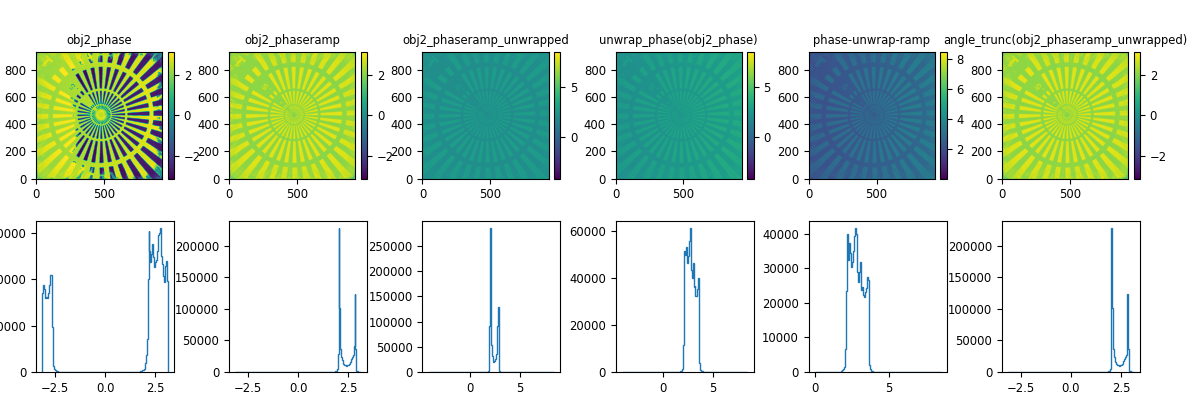

In [89]:
# Histograms
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(2 * 6, 2*2))
fig.subplots_adjust(left=0.03, bottom=0.07, right=0.95, top=0.9, wspace=0.40, hspace=0.2)
subfig24 = axs[0,0].imshow(obj2_phase, origin='lower')
subfig25 = axs[0,1].imshow(obj2_phaseramp, origin='lower')
subfig26 = axs[0,2].imshow(obj2_phaseramp_unwrapped, origin='lower')
subfig27 = axs[0,3].imshow(unwrap_phase(obj2_phase), origin='lower')
subfig29 = axs[0,4].imshow(np.abs(rmphaseramp(unwrap_phase(obj2_phase), w2)), origin='lower')
subfig30 = axs[0,5].imshow(angle_trunc(obj2_phaseramp_unwrapped), origin='lower')

plt.colorbar(subfig24, ax=axs[0,0], fraction=0.046, pad=0.04)
plt.colorbar(subfig25, ax=axs[0,1], fraction=0.046, pad=0.04)
plt.colorbar(subfig26, ax=axs[0,2], fraction=0.046, pad=0.04)
plt.colorbar(subfig27, ax=axs[0,3], fraction=0.046, pad=0.04)
plt.colorbar(subfig29, ax=axs[0,4], fraction=0.046, pad=0.04)
plt.colorbar(subfig30, ax=axs[0,5], fraction=0.046, pad=0.04)

plt.setp(axs[0,0], title='obj2_phase')                   # 'obj-> phase'
plt.setp(axs[0,1], title='obj2_phaseramp')               # 'obj-> rmramp-> phase'
plt.setp(axs[0,2], title='obj2_phaseramp_unwrapped')     # 'obj-> rmramp-> phase-> unwrap'
plt.setp(axs[0,3], title='unwrap_phase(obj2_phase)')     # 'obj-> phase-> unwrap'
plt.setp(axs[0,4], title='phase-unwrap-ramp')            # 'obj-> phase-> unwrap-> rmramp'
plt.setp(axs[0,5], title='angle_trunc(obj2_phaseramp_unwrapped)')      # 

counts, bins = np.histogram(obj2_phase, bins=157)
axs[1,0].stairs(counts, bins)
counts, bins = np.histogram(obj2_phaseramp, bins=157)
axs[1,1].stairs(counts, bins)
counts, bins = np.histogram(obj2_phaseramp_unwrapped, bins=157)
axs[1,2].stairs(counts, bins)
counts, bins = np.histogram(unwrap_phase(obj2_phase), bins=157)
axs[1,3].stairs(counts, bins)
counts, bins = np.histogram(np.abs(rmphaseramp(unwrap_phase(obj2_phase), w2)), bins=157)
axs[1,4].stairs(counts, bins)
counts, bins = np.histogram(subfig30.get_array().data, bins=157)
axs[1,5].stairs(counts, bins)



# for ax in axs[1,:]:
#     ax.set_yscale('log')
#     # ax.set_ylim(-100,20000)

#fig.savefig(fname2.rsplit('/', 2)[0] + f'/hist{lable}.png')

In [ ]:
# Figuring out phase_cross_correlation
from scipy.fft import fftn, ifftn, fftfreq

#shift2offline, error1, phasediff1 = phase_cross_correlation(obj_phaseramp[marg:-marg,marg:-marg], obj1_phaseramp[marg:-marg,marg:-marg], upsample_factor=1000, space='real', disambiguate=False, overlap_ratio=0.3, normalization='phase')
normalization = "phase"

reference_image = obj[marg:-marg,marg:-marg]
moving_image = obj1[marg:-marg,marg:-marg]
# from source code:
src_freq = fftn(reference_image)
target_freq = fftn(moving_image)

shape = src_freq.shape
image_product = src_freq * target_freq.conj()
if normalization == "phase":
    eps = np.finfo(image_product.real.dtype).eps
    image_product /= np.maximum(np.abs(image_product), 100 * eps)

cross_correlation = ifftn(image_product)

# Locate maximum
maxima = np.unravel_index(np.argmax(np.abs(cross_correlation)),
                          cross_correlation.shape)
midpoints = np.array([np.fix(axis_size / 2) for axis_size in shape])

float_dtype = image_product.real.dtype

shifts = np.stack(maxima).astype(float_dtype, copy=False)
shifts[shifts > midpoints] -= np.array(shape)[shifts > midpoints]

In [ ]:
# Plots for cell above
data = image_product
plt.figure()
plt.imshow(np.log(np.abs(data)))
plt.figure()
plt.imshow((np.angle(data)))

print(data.dtype, maxima, midpoints, shifts)


In [ ]:
#fff, axs = plt.subplots(nrows=1, ncols=2, figsize=(4.5 * 2.5, 4.5),tight_layout={'pad': 0.0})
# axs[0].imshow(np.abs(obj1) - np.abs(obj1_ramp), origin='lower')
# axs[1].imshow(np.abs(obj2) - np.abs(obj2_ramp), origin='lower')

#axs[0].imshow(np.log(np.abs(obj1)) - np.log(np.abs(obj1_ramp)), origin='lower')
#axs[1].imshow(np.log(np.abs(obj2)) - np.log(np.abs(obj2_ramp)), origin='lower')

# obj1_abslog = np.log(obj1_abs)
# obj2_abslog = np.log(obj2_abs)

plt.figure()
rampdiff2 = np.log(np.abs(obj2)) - np.log(np.abs(obj2_ramp))
sf=plt.imshow(rampdiff2, origin='lower')

sf.set_clim(set_vminvmax(sf.get_array().data, 1))

# def set_vminvmax(arr, std_factor):
#     vmin = np.mean(arr[marg:-marg,marg:-marg]) - std_factor*np.std(arr[marg:-marg,marg:-marg])
#     vmax = np.mean(arr[marg:-marg,marg:-marg]) + std_factor*np.std(arr[marg:-marg,marg:-marg])
#     return vmin, vmax

# # im[0].norm.vmin = 0.4
# # im[0].norm.vmax = 0.6
# # im[0].get_array()
# for m in range(len(im)-4):
#     im[m].set_clim(set_vminvmax(im[m].get_array().data, 1))

In [ ]:
factor = 0.01
print(np.mean(rampdiff2) - factor*np.std(rampdiff2))

print(np.mean(rampdiff2) + factor*np.std(rampdiff2))

In [ ]:
np.mean(rampdiff2), np.std(rampdiff2)

In [ ]:
fname1.rsplit('/', 2)[0] + '/GT_diff.eps'

In [ ]:
fname1

In [ ]:
# Figuring out subpixel shifting
arr1 = np.ones((26,26))*2
arr1[9:11,:] = 10
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(4.5 * 3.5, 4.5),tight_layout={'pad': 0.0})
axs[0].imshow(arr1, origin='lower', interpolation='None', vmin=0, vmax=10)
axs[1].imshow(shift(arr1, [1.37,0]), origin='lower', interpolation='None', vmin=0, vmax=10)
axs[2].imshow(shift(arr1, [-1.37,0]), origin='lower', interpolation='None', vmin=0, vmax=10)

for ax in axs:
    ax.grid(which='both', color='k')
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.tick_params(which='both')



arr1 = np.ones((26,26))*2
arr2 = np.ones((26,26))*2
arr1[9,:] = 10.
arr2[11,:] = 10.
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(4.5 * 3.5, 4.5),tight_layout={'pad': 0.0})
axs[0].imshow(arr1-arr2, origin='lower', interpolation='None', vmin=-10, vmax=10)
axs[1].imshow(arr1-shift(arr2, [-2,0]), origin='lower', interpolation='None', vmin=-10, vmax=10)
axs[2].imshow(shift(arr1, [1,0])-shift(arr2, [-1,0]), origin='lower', interpolation='None', vmin=-10, vmax=10)

for ax in axs:
    ax.grid(which='both', color='k')
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.tick_params(which='both')





arr1 = np.ones((26,26))*2
arr2 = np.ones((26,26))*2
arr1[5:10,:] = 10.
arr2[15:20,:] = 10.
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(4.5 * 3.5, 4.5),tight_layout={'pad': 0.0})
axs[0].imshow(arr1-arr2, origin='lower', interpolation='None', vmin=-10, vmax=10)
axs[1].imshow(arr1-shift(arr2, [-10,0]), origin='lower', interpolation='None', vmin=-10, vmax=10)
axs[2].imshow(shift(arr1, [5,0])-shift(arr2, [-5,0]), origin='lower', interpolation='None', vmin=-10, vmax=10)

for ax in axs:
    ax.grid(which='both', color='k')
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.tick_params(which='both')




arr1 = np.ones((26,26))*2
arr2 = np.ones((26,26))*2
arr1[5:10,:] = 10.
arr2[7:12,:] = 10.
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(4.5 * 3.5, 4.5),tight_layout={'pad': 0.0})
axs[0].imshow(arr1-arr2, origin='lower', interpolation='None', vmin=-10, vmax=10)
axs[1].imshow(arr1-shift(arr2, [-2,0]), origin='lower', interpolation='None', vmin=-10, vmax=10)
axs[2].imshow(shift(arr1, [1,0])-shift(arr2, [-1,0]), origin='lower', interpolation='None', vmin=-10, vmax=10)

for ax in axs:
    ax.grid(which='both', color='k')
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.tick_params(which='both')

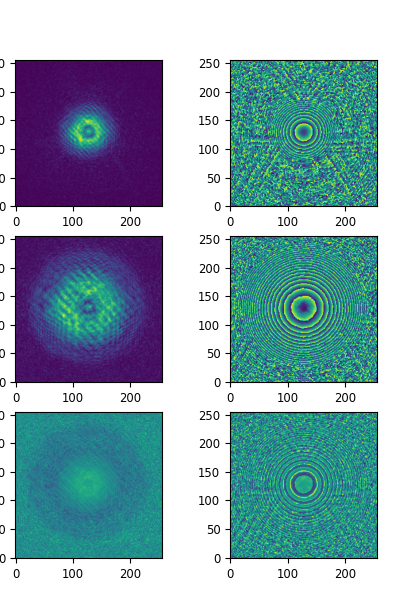

In [18]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(2 * 2, 3*2))
fig.subplots_adjust(left=0.03, bottom=0.07, right=0.95, top=0.9, wspace=0.40, hspace=0.2)
axs[0,0].imshow(np.abs(pr), origin='lower')
axs[0,1].imshow(np.angle(pr), origin='lower')
axs[1,0].imshow(np.abs(pr1), origin='lower')
axs[1,1].imshow(np.angle(pr1), origin='lower')
subfig24 = axs[2,0].imshow(diff1_pr_abs, origin='lower')
subfig25 = axs[2,1].imshow(diff1_pr_phase, origin='lower')



In [65]:
# WHY ARE PROBES NOT THE SAMEEE

tutorial_data_home = "/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/"  # "../../data/"
path_to_probe = "original_recon/NTT_1190_startframe2912_crop256_dist367_defocus980_a0.8_00/dumps/dump_scan_000000_DM_pycuda_1000.ptyr"  # "small_data/dls_i08_nanogold_recon.ptyr"
sim_probe = os.path.join(tutorial_data_home, path_to_probe)
probe = io.h5read(sim_probe, '/content/probe')['/content/probe']['Sscan00G00']['data'][0] ##

print((probe==pr).all())

fname4 = '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/from_sim256px_08/NTT_1190_prGT_startframe2912_crop256_fpb50_dist367_defocus980_a0.8_03/dumps/dump_scan_000003_None_0000.ptyr'
# fname4 = '/data/staff/nanomax/reblex/data-simulated-recons/NTT_scan_001190/simulated_recons/from_sim256px_08/NTT_1190_prGT_startframe2912_crop256_fpb50_dist367_defocus980_a0.8_02/dumps/dump_scan_000002_DM_pycuda_0890.ptyr'
pr1_0000 = io.h5read(fname4, '/content/probe')['/content/probe']['Sscan00G00']['data'][0]
print((probe==pr1_0000).all())


True
False


In [27]:
np.sum(np.abs(pr))/ np.sum(np.abs(pr1))

1.9249635

In [26]:
np.mean(np.abs(pr)), np.mean(np.abs(pr1))

(38.406128, 19.951614)